In this notebook, I worked by myself based on a project of the Kaggle website: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

My works include two principal parts: 

* Data visulisation, and

* Predicting the house's price by using the three models including Linear regression, Gradient Boosting (GBM) regression and eXtreme Gradient Boosting (Xgboost) regression.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec
from matplotlib.gridspec import GridSpec

import seaborn as sns

import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

from plotly.subplots import make_subplots
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


In [2]:
#read data
train = pd.read_csv('/Users/thientrangbui/Dropbox/Kaggle competion/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/Users/thientrangbui/Dropbox/Kaggle competion/house-prices-advanced-regression-techniques/test.csv')

In [53]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [54]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [5]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [3]:
ntrain = train.shape[0]
ntest = test.shape[0]

In [4]:
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)

In [5]:
#missing data
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)

missing_data = all_data_na.to_frame().reset_index()
missing_data.columns = ['Column_Name','Missing Ratio']

In [23]:
missing_data

Column_Name  Missing Ratio
0         PoolQC      99.657417
1    MiscFeature      96.402878
2          Alley      93.216855
3          Fence      80.438506
4    FireplaceQu      48.646797
5    LotFrontage      16.649538
6   GarageFinish       5.447071
7    GarageYrBlt       5.447071
8     GarageQual       5.447071
9     GarageCond       5.447071
10    GarageType       5.378554
11  BsmtExposure       2.809181
12      BsmtCond       2.809181
13      BsmtQual       2.774923
14  BsmtFinType2       2.740665
15  BsmtFinType1       2.706406
16    MasVnrType       0.822199
17    MasVnrArea       0.787941
18      MSZoning       0.137033
19  BsmtFullBath       0.068517
20  BsmtHalfBath       0.068517
21     Utilities       0.068517
22    Functional       0.068517
23   Exterior2nd       0.034258
24   Exterior1st       0.034258
25      SaleType       0.034258
26    BsmtFinSF1       0.034258
27    BsmtFinSF2       0.034258
28     BsmtUnfSF       0.034258
29    Electrical       0.034258
30   KitchenQual       0.034258
31    GarageCars       0.034258
32    GarageArea       0.034258
33   TotalBsmtSF       0.034258

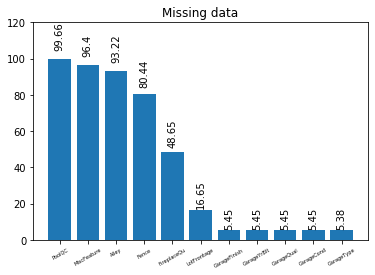

In [12]:
missing_data_plot = missing_data[missing_data['Missing Ratio'] > 5]

fig, ax = plt.subplots()

bar_x = [1,2,3,4,5,6,7,8,9,10,11]
bar_height = np.asarray(missing_data_plot[['Missing Ratio']]).reshape(-1)
bar_tick_label = np.asarray(missing_data_plot[['Column_Name']]).reshape(-1)
bar_label = np.asarray(round(missing_data_plot[['Missing Ratio']],2)).reshape(-1)

bar_plot = plt.bar(bar_x,bar_height)
plt.xticks(bar_x, bar_tick_label, fontsize=5, rotation=30)
def autolabel(rects):
    for idx,rect in enumerate(bar_plot):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                bar_label[idx],
                ha='center', va='bottom', rotation=90)

autolabel(bar_plot)
plt.ylim(0,120)


plt.title('Missing data')

plt.show()

In [6]:
all_data.drop(columns=['PoolQC','MiscFeature','Alley','Fence'],axis=1,inplace=True)

In [59]:
all_data.shape

(2919, 76)

In [43]:
all_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [14]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [7]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_list=all_data.select_dtypes(include=numerics).columns
numerical_list

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

Well, let's see details each numerical variables which its names are listed on the above list. Then we take a look at each variable to see whether it has been properly classified in numeric/ characteric yet. Else, we exchange them into the charactical variables. 

* **MSSubClass:** The building class identifies the type of dwelling involved in the sale: 20	1-STORY 1946 & NEWER ALL STYLES;  30	1-STORY 1945 & OLDER; 40	1-STORY W/FINISHED ATTIC ALL AGES;  45	1-1/2 STORY - UNFINISHED ALL AGES; 50	1-1/2 STORY FINISHED ALL AGES; 60	2-STORY 1946 & NEWER; 70	2-STORY 1945 & OLDER; 75	2-1/2 STORY ALL AGES; 80	SPLIT OR MULTI-LEVEL; 85	SPLIT FOYER; 90	DUPLEX - ALL STYLES AND AGES; 120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER; 150	1-1/2 STORY PUD - ALL AGES; 160	2-STORY PUD - 1946 & NEWER; 180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER; 190	2 FAMILY CONVERSION - ALL STYLES AND AGES

**==> it should be a characterical variable**

* LotFrontage: Linear feet of street connected to property

* LotArea: Lot size in square feet

* **OverallQual:** Overall material and finish quality: 10-Very Excellent; 9-Excellent; 8-Very Good; 7-Good; 6-Above Average; 5-Average; 4-Below Average; 3-Fair; 2-Poor; 1-Very Poor

**==> it should be a characterical variable**

* **OverallCond:** Overall condition rating. Rates the overall condition of the house: 10	Very Excellent; 9	Excellent;  8	Very Good; 7	Good; 6	Above Average; 5	Average; 4	Below Average; 3	Fair; 2	Poor; 1	Very Poor

**==> it should be a characterical variable**

* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* MoSold: Month Sold
* YrSold: Year Sold

**==> they should be exchanged to datetime features, but we will consider later**

* MasVnrArea: Masonry veneer area in square feet
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* BedroomAbvGr: Number of bedrooms above basement level
* KitchenAbvGr: Number of kitchens
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Fireplaces: Number of fireplaces
* GarageYrBlt: Year garage was built
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* MiscVal: Value of miscellaneous feature


In [8]:
numerical_list = numerical_list.drop(['OverallQual','OverallCond','MSSubClass','Id'])
numerical_list

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [9]:
category=['object']
categorical_list=all_data.select_dtypes(include=category).columns
categorical_list

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

* MSZoning: The general zoning classification
* Street: Type of road access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinType2: Quality of second finished area (if present)
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* KitchenQual: Kitchen quality
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageFinish: Interior finish of the garage
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* SaleType: Type of sale
* SaleCondition: Condition of sale

And we add more three numerical variables which we would like to exchange them into the ojects including:

* OverallQual: Overall material and finish quality
* MSSubClass: The building class identifies the type of dwelling involved in the sale
* OverallCond: Overall condition rating. Rates the overall condition of the house

In [10]:
categorical_list = categorical_list.append(pd.Index(['OverallQual','OverallCond','MSSubClass']))
categorical_list

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'OverallQual',
       'OverallCond', 'MSSubClass'],
      dtype='object')

In [11]:
#let's exchange some numerical features to object forms
int_to_object = ['MSSubClass','OverallQual','OverallCond']

for feature in int_to_object:
    all_data[feature] = all_data[feature].astype(object)

int_to_datetime = ['YearBuilt', 'YearRemodAdd','MoSold', 'YrSold']

Now, we re filling the null values. Firstly, we'll deal with the numerical features. 

In [45]:
all_data[numerical_list].isna().sum().sort_values(ascending=False)

LotFrontage      486
GarageYrBlt      159
MasVnrArea        23
BsmtHalfBath       2
BsmtFullBath       2
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
GarageCars         1
TotalBsmtSF        1
GarageArea         1
YearRemodAdd       0
YearBuilt          0
LotArea            0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
YrSold             0
FullBath           0
MoSold             0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
HalfBath           0
dtype: int64

In [12]:
#filling the missing values with mean
features_replace_by_mean = ['LotFrontage','GarageYrBlt','MasVnrArea','GarageArea','BsmtUnfSF','BsmtHalfBath','BsmtFinSF1',
'BsmtFinSF2','BsmtFullBath','TotalBsmtSF','GarageCars']
for col in features_replace_by_mean:
    all_data[col].fillna(all_data[col].mean(),inplace=True)

In [47]:
#check again
all_data[numerical_list].isna().sum().sort_values(ascending=False)

YrSold           0
FullBath         0
LotArea          0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
HalfBath         0
MoSold           0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
LotFrontage      0
dtype: int64

In [48]:
#Now let's examine categorical features
all_data[categorical_list].isna().sum().sort_values(ascending=False)

FireplaceQu      1420
GarageCond        159
GarageQual        159
GarageFinish      159
GarageType        157
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MSZoning            4
Utilities           2
Functional          2
KitchenQual         1
SaleType            1
Electrical          1
Exterior2nd         1
Exterior1st         1
PavedDrive          0
BldgType            0
Street              0
LotShape            0
LandContour         0
CentralAir          0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
HouseStyle          0
SaleCondition       0
RoofStyle           0
RoofMatl            0
HeatingQC           0
Heating             0
OverallQual         0
ExterQual           0
ExterCond           0
Foundation          0
OverallCond         0
MSSubClass          0
dtype: int64

In [49]:
#FireplaceQu: Fireplace quality
all_data['FireplaceQu'].value_counts()

Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64

In [66]:
missing_data.loc[missing_data.Column_Name == 'FireplaceQu']

Column_Name  Missing Ratio
4  FireplaceQu      48.646797

We only have half of Fireplace quality data. Let's have a look at the Fireplaces feature.

In [37]:
all_data[all_data['FireplaceQu'].isnull()][['Fireplaces','FireplaceQu']]

Fireplaces FireplaceQu
0              0         NaN
5              0         NaN
10             0         NaN
12             0         NaN
15             0         NaN
...          ...         ...
2912           0         NaN
2913           0         NaN
2914           0         NaN
2915           0         NaN
2917           0         NaN

[1420 rows x 2 columns]

So we can see that the missing values are at those places, where number of fireplaces is zero.
We can't fill these missing values with anything. As there is no meaning in it. Instead we will create a separate category in FireplaceQu feature of NotAvailable.

In [13]:
all_data['FireplaceQu'] = all_data['FireplaceQu'].fillna('NotAvailable')

Garage :
* GarageType: Garage location 
* GarageFinish: Interior finish of the garage
* GarageQual: Garage quality
* GarageCond: Garage condition


In [39]:
#Garage : GarageCond, GarageQual, GarageFinish, GarageType
missing_data[missing_data.Column_Name.isin(['GarageType','GarageFinish','GarageQual','GarageCond'])]

Column_Name  Missing Ratio
6   GarageFinish       5.447071
8     GarageQual       5.447071
9     GarageCond       5.447071
10    GarageType       5.378554

In [88]:
all_data[all_data['GarageFinish'].isnull()][['GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']]

GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
39          NaN  1978.113406          NaN         0.0         0.0        NaN   
48          NaN  1978.113406          NaN         0.0         0.0        NaN   
78          NaN  1978.113406          NaN         0.0         0.0        NaN   
88          NaN  1978.113406          NaN         0.0         0.0        NaN   
89          NaN  1978.113406          NaN         0.0         0.0        NaN   
...         ...          ...          ...         ...         ...        ...   
2893        NaN  1978.113406          NaN         0.0         0.0        NaN   
2909        NaN  1978.113406          NaN         0.0         0.0        NaN   
2913        NaN  1978.113406          NaN         0.0         0.0        NaN   
2914        NaN  1978.113406          NaN         0.0         0.0        NaN   
2917        NaN  1978.113406          NaN         0.0         0.0        NaN   

     GarageCond  
39          NaN  
48          NaN  
78          NaN  
88          NaN  
89          NaN  
...         ...  
2893        NaN  
2909        NaN  
2913        NaN  
2914        NaN  
2917        NaN  

[159 rows x 7 columns]

In [14]:
all_data[['GarageType','GarageFinish',
 'GarageQual','GarageCond']].mode()

GarageType GarageFinish GarageQual GarageCond
0     Attchd          Unf         TA         TA

The missing data may be as no data is available for the garage. We can't fill these too with their mode values as we do not have any idea abvout the garage. We'll simply fill them with No Garage.

In [15]:
#
fill_with_No_Grg = ['GarageType','GarageFinish','GarageQual','GarageCond']
  
for col in fill_with_No_Grg:
    all_data[col].fillna('No_Grg',inplace=True)

The basement features: 
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinType2: Quality of second finished area (if present)

In [70]:
missing_data[missing_data.Column_Name.isin(['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'])]

Column_Name  Missing Ratio
11  BsmtExposure       2.809181
12      BsmtCond       2.809181
13      BsmtQual       2.774923
14  BsmtFinType2       2.740665
15  BsmtFinType1       2.706406

In [43]:
all_data[all_data['BsmtExposure'].isnull()][['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']]

BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2
17        NaN      NaN          NaN          NaN          NaN
39        NaN      NaN          NaN          NaN          NaN
90        NaN      NaN          NaN          NaN          NaN
102       NaN      NaN          NaN          NaN          NaN
156       NaN      NaN          NaN          NaN          NaN
...       ...      ...          ...          ...          ...
2803      NaN      NaN          NaN          NaN          NaN
2804      NaN      NaN          NaN          NaN          NaN
2824      NaN      NaN          NaN          NaN          NaN
2891      NaN      NaN          NaN          NaN          NaN
2904      NaN      NaN          NaN          NaN          NaN

[82 rows x 5 columns]

In [16]:
fill_with_No_Bsmt = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']

for col in fill_with_No_Bsmt:
    all_data[col].fillna('No_Bsmt',inplace=True)

* MasVnrType: Masonry veneer type: BrkCmn-Brick Common;  BrkFace-Brick Face; CBlock-Cinder Block; None - None; Stone-Stone

In [96]:
#MasVnrType: 
missing_data[missing_data.Column_Name.isin(['MasVnrType'])]

Column_Name  Missing Ratio
16  MasVnrType       0.822199

In [17]:
all_data['MasVnrType'].fillna('None',inplace=True)

* MSZoning: Identifies the general zoning classification of the sale. A-Agriculture, C-Commercial, FV-Floating Village Residential, I-Industrial, RH-Residential High Density, RL-Residential Low Density, RP-Residential Low Density Park, RM-Residential Medium Density



In [18]:
#filling the missing values with mode
features_replace_by_mode = ['MSZoning','Utilities','Functional','KitchenQual','Exterior1st','Electrical','Exterior2nd','SaleType']
for col in features_replace_by_mode:
    all_data[col].fillna(all_data[col].mode()[0],inplace=True)

In [74]:
all_data[categorical_list].isna().sum().sort_values(ascending=False)

MSSubClass       0
BldgType         0
ExterCond        0
ExterQual        0
MasVnrType       0
Exterior2nd      0
Exterior1st      0
RoofMatl         0
RoofStyle        0
HouseStyle       0
Condition2       0
OverallCond      0
Condition1       0
Neighborhood     0
LandSlope        0
LotConfig        0
Utilities        0
LandContour      0
LotShape         0
Street           0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
OverallQual      0
SaleCondition    0
SaleType         0
PavedDrive       0
GarageCond       0
GarageQual       0
GarageFinish     0
GarageType       0
FireplaceQu      0
Functional       0
KitchenQual      0
Electrical       0
CentralAir       0
HeatingQC        0
Heating          0
BsmtFinType2     0
BsmtFinType1     0
MSZoning         0
dtype: int64

In [19]:
#check again null values for all data
all_data.isna().sum().sum()

0

**Visualisation**

In [20]:
#separate train and test data again
data_train = all_data[0:ntrain]
data_train['SalePrice'] = train.SalePrice

In [50]:
data_train.tail()

Id MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
1455  1456         60       RL         62.0     7917   Pave      Reg   
1456  1457         20       RL         85.0    13175   Pave      Reg   
1457  1458         70       RL         66.0     9042   Pave      Reg   
1458  1459         20       RL         68.0     9717   Pave      Reg   
1459  1460         20       RL         75.0     9937   Pave      Reg   

     LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch  \
1455         Lvl    AllPub    Inside  ...             0         0           0   
1456         Lvl    AllPub    Inside  ...             0         0           0   
1457         Lvl    AllPub    Inside  ...             0         0           0   
1458         Lvl    AllPub    Inside  ...           112         0           0   
1459         Lvl    AllPub    Inside  ...             0         0           0   

     PoolArea MiscVal MoSold YrSold SaleType  SaleCondition  SalePrice  
1455        0       0      8   2007       WD         Normal     175000  
1456        0       0      2   2010       WD         Normal     210000  
1457        0    2500      5   2010       WD         Normal     266500  
1458        0       0      4   2010       WD         Normal     142125  
1459        0       0      6   2008       WD         Normal     147500  

[5 rows x 77 columns]

In [21]:
data_test = all_data[ntrain+1:]

In [52]:
data_test.head()

Id MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
1461  1462         20       RL         81.0    14267   Pave      IR1   
1462  1463         60       RL         74.0    13830   Pave      IR1   
1463  1464         60       RL         78.0     9978   Pave      IR1   
1464  1465        120       RL         43.0     5005   Pave      IR1   
1465  1466         60       RL         75.0    10000   Pave      IR1   

     LandContour Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
1461         Lvl    AllPub    Corner  ...          36             0         0   
1462         Lvl    AllPub    Inside  ...          34             0         0   
1463         Lvl    AllPub    Inside  ...          36             0         0   
1464         HLS    AllPub    Inside  ...          82             0         0   
1465         Lvl    AllPub    Corner  ...          84             0         0   

     ScreenPorch PoolArea MiscVal MoSold YrSold  SaleType  SaleCondition  
1461           0        0   12500      6   2010        WD         Normal  
1462           0        0       0      3   2010        WD         Normal  
1463           0        0       0      6   2010        WD         Normal  
1464         144        0       0      1   2010        WD         Normal  
1465           0        0       0      4   2010        WD         Normal  

[5 rows x 76 columns]

In [21]:
data_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

* Our target feature is a continuous variable with values ranging from 34900 to 755000. 
* The average sale price of all the houses in our dataset is 180921.

In [71]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Histogram(x=data_train['SalePrice']),row=1,col=1)
fig.add_trace(go.Box(y=data_train['SalePrice'],boxpoints='all',line_color='orange'),row=1,col=2)

fig.update_layout(height=500, showlegend=False,title_text="Sale Price Distribution and Box plot")

Thus, we see some points about Sale Price:

* It has a right skewed distribution. On the other hand, its median is 163k which is less than the average value i.e cause of the right skewed distribution.

* We can see some of the houses have sale price more than 400k

**Sale Price with Other Features**

*We aim to point out the highly correlated features in the list of numerical and categorical features with our target feature (SalePrice).*

First, we consider numerical features. However, we separate the numerical features into the discrete and continuous numercial features. And we consider the discrete numerical features as categorial features. 


In [23]:
discrete_features=[]
for col in data_train.columns:
    if data_train[col].dtype=='int64' and len(data_train[col].unique()) <=15:
        discrete_features.append(col)

In [24]:
discrete_features

['FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'PoolArea',
 'MoSold',
 'YrSold']

In [126]:
#Let's take a look at the unique values of each of these features
for col in discrete_features:
    print("{} has {} unique values.".format(col,data_train[col].unique()))

FullBath has [2 1 3 0] unique values.
HalfBath has [1 0 2] unique values.
BedroomAbvGr has [3 4 1 2 0 5 6 8] unique values.
KitchenAbvGr has [1 2 3 0] unique values.
TotRmsAbvGrd has [ 8  6  7  9  5 11  4 10 12  3  2 14] unique values.
Fireplaces has [0 1 2 3] unique values.
PoolArea has [  0 512 648 576 555 480 519 738] unique values.
MoSold has [ 2  5  9 12 10  8 11  4  1  7  3  6] unique values.
YrSold has [2008 2007 2006 2009 2010] unique values.


Visualize Discrete Features with their average Sale Price

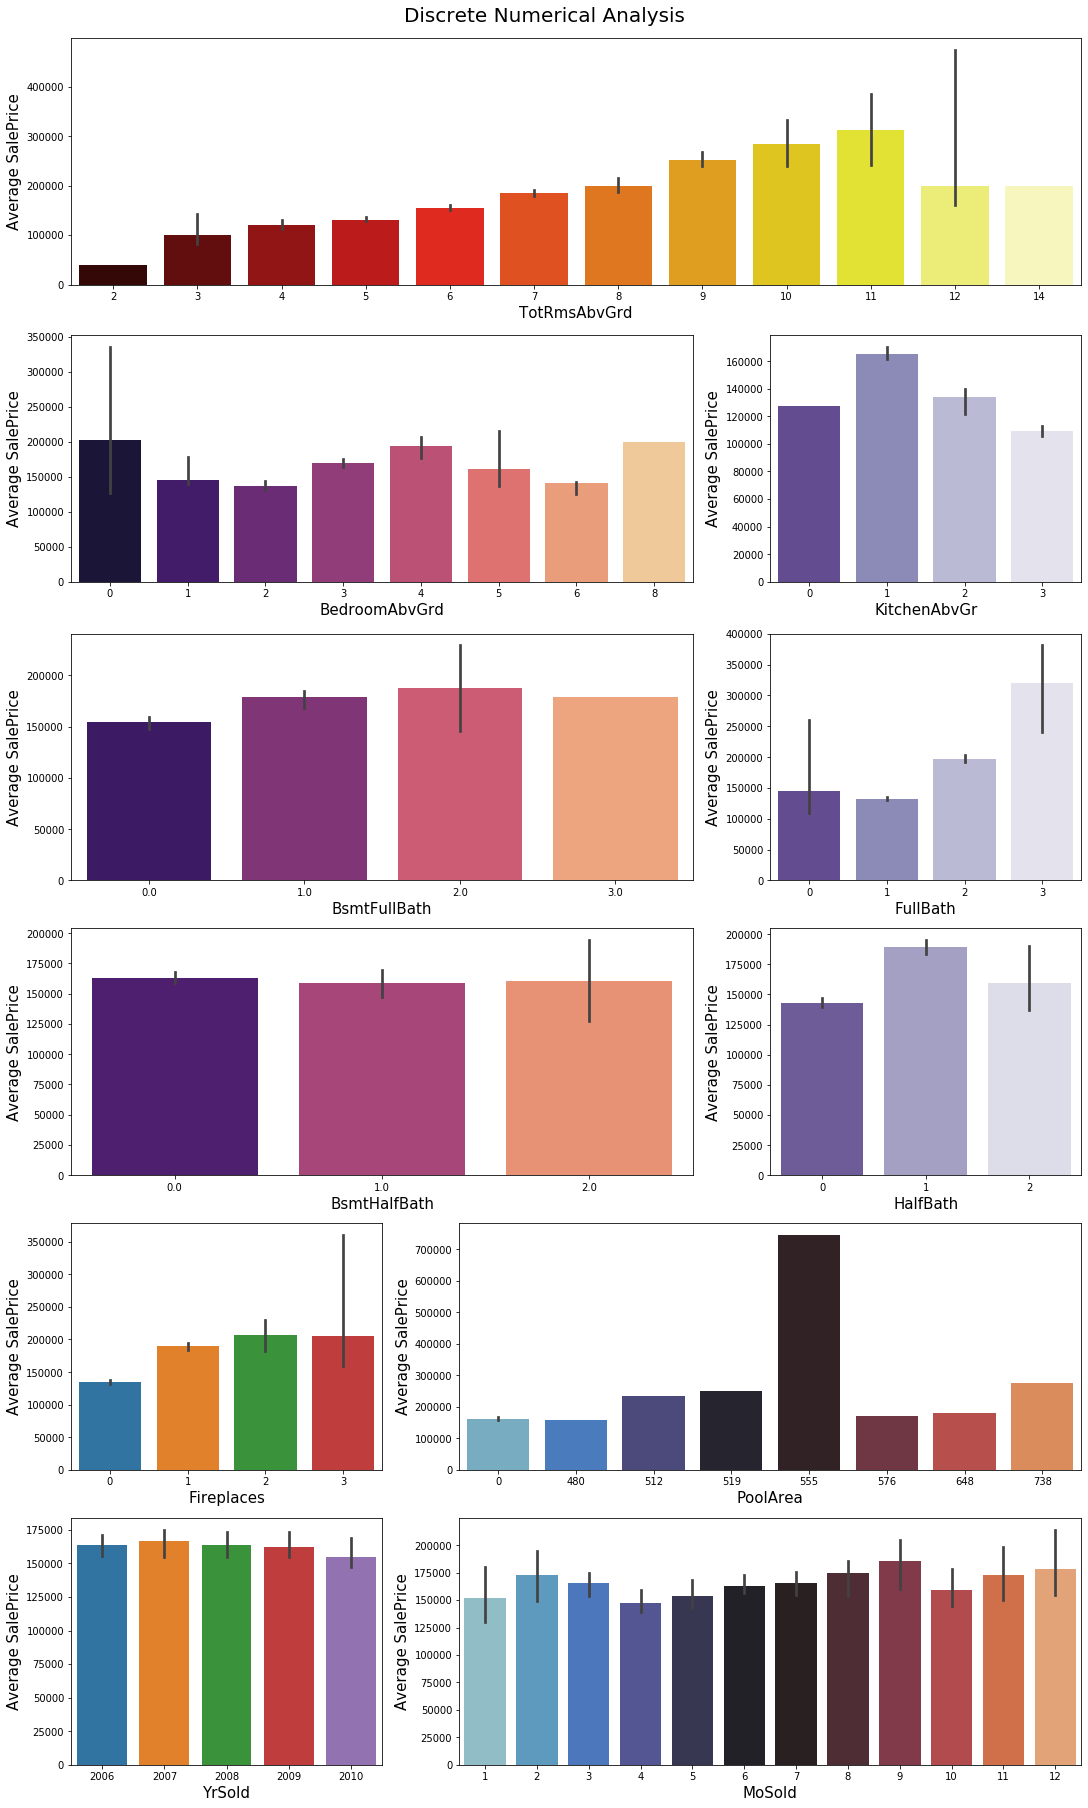

In [25]:
from numpy import median

fig = plt.figure(constrained_layout=True,figsize=(15,25))
gs = GridSpec(6, 3, figure=fig)

plt.subplot(gs[0,:])
a1 = sns.barplot(data=data_train,x="TotRmsAbvGrd",y="SalePrice",estimator=median,palette='hot')
plt.xlabel("TotRmsAbvGrd",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[1,:-1])
a1 = sns.barplot(data=data_train,x="BedroomAbvGr",y="SalePrice",estimator=median,palette='magma')
plt.xlabel("BedroomAbvGrd",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[1,-1])
a1 = sns.barplot(data=data_train,x="KitchenAbvGr",y="SalePrice",estimator=median,palette='Purples_r')
plt.xlabel("KitchenAbvGr",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[2,:-1])
a1 = sns.barplot(data=data_train,x="BsmtFullBath",y="SalePrice",estimator=median,palette='magma')
plt.xlabel("BsmtFullBath",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[2,-1])
a1 = sns.barplot(data=data_train,x="FullBath",y="SalePrice",estimator=median,palette='Purples_r')
plt.xlabel("FullBath",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[3,:-1])
a1 = sns.barplot(data=data_train,x="BsmtHalfBath",y="SalePrice",estimator=median,palette='magma')
plt.xlabel("BsmtHalfBath",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[3,-1])
a1 = sns.barplot(data=data_train,x="HalfBath",y="SalePrice",estimator=median,palette='Purples_r')
plt.xlabel("HalfBath",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[4,:-2])
a1 = sns.barplot(data=data_train,x="Fireplaces",y="SalePrice",estimator=median)
plt.xlabel("Fireplaces",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[4,-2:])
a1 = sns.barplot(data=data_train,x="PoolArea",y="SalePrice",estimator=median,palette='icefire')
plt.xlabel("PoolArea",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[5,:-2])
a1 = sns.barplot(data=data_train,x="YrSold",y="SalePrice",estimator=median)
plt.xlabel("YrSold",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[5,-2:])
a1 = sns.barplot(data=data_train,x="MoSold",y="SalePrice",estimator=median,palette='icefire')
plt.xlabel("MoSold",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.suptitle("Discrete Numerical Analysis",fontsize=20);

From these above graphs, we get few points as following:

* Total Rooms Above Ground : We see an exponential curve form there. It means the SalePrice increases when the total number of rooms increases. However, it will decreases if the total number of rooms is exceed 11 rooms. 

* Bedroom Above Ground : Here we don't see an exponential curve, as for 0 bedrooms the sale price is highestn (it has a little bit strange there, cause the bedrooms occupies an important decision in choosing and buying a house. Anw, don't mind my comments, just my questions) followed by 4 and 8 bedrooms.housee The lowest is for 2 and 6 bedrooms.

* Kitchen Above ground : The highest SalePrice is dealt with house including a kitchen, it's logic cause only one kitchen is enough. So the number of kitchen increases, the SalePrice decreases.

* InBasemnt Full bathroomsandBasement Half bathrooms:  we don't see a much difference and if there is no bathroom,obviously price will be less. Now if we don't consider basement rooms,i.e Above grade Full Bathrooms and Half bathrooms .If there are 3 full bathrooms ,the price is highest and for 1 or 2 half bathrooms the average price is more than 150000.

* Fireplaces : Fireplaces are quite important in a house, so we see that as fireplaces increase in the house, the SalePrice increases.

* PoolArea : Here we are talking about square feet of the pool area. And from the barplot 555 sqft area is having highest sale price on average. However, the SalePrice will decrease if it exceeds 555 sqft. 

* Year Sold : The houses in our dataset were sold from year 2006. We can see a bit downward slope from 2006 to 2010.

* Month Sold : There is not much to study about which month the house sold has higher or lower Sale Price.

**Now we can analyze the rest of the continuous numerical features**

In [45]:
num_not_discrete = []

num_data_train = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_list_data_train=data_train.select_dtypes(include=num_data_train).columns

for col in data_train[num_list_data_train].columns:
    if col not in ['YearBuilt','YearRemodAdd','MoSold','YrSold','GarageYrBlt'] and col not in discrete_features:
        num_not_discrete.append(col)

In [46]:
num_not_discrete

['Id',
 'LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

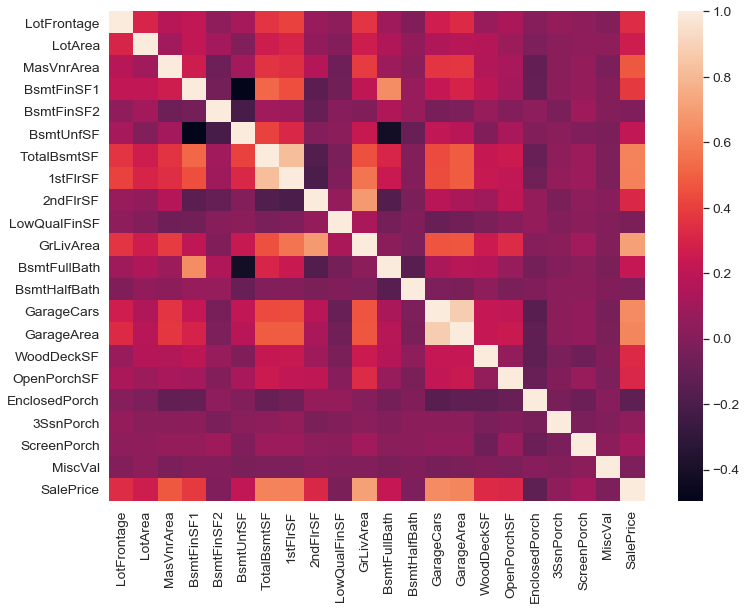

In [56]:
train_num_not_discrete = data_train[num_not_discrete].drop(['Id'],axis=1)
corrmat = train_num_not_discrete.corr()

fig = plt.figure(figsize=(12,9))

sns.heatmap(corrmat)

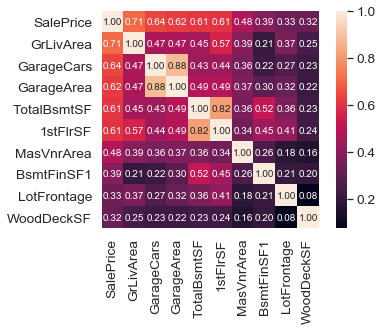

In [57]:
#heatmap we take 10 variables including the largest value in the correlation matrix with SalePrice
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_num_not_discrete[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Well, as the heatmap shows us the variables's name which have highest correlation with SalePrice including:

* GrLiveArea: Above grade (ground) living area square feet
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* TotalBsmtSF:Total square feet of basement area
* 1stFIrSF: First Floor square feet

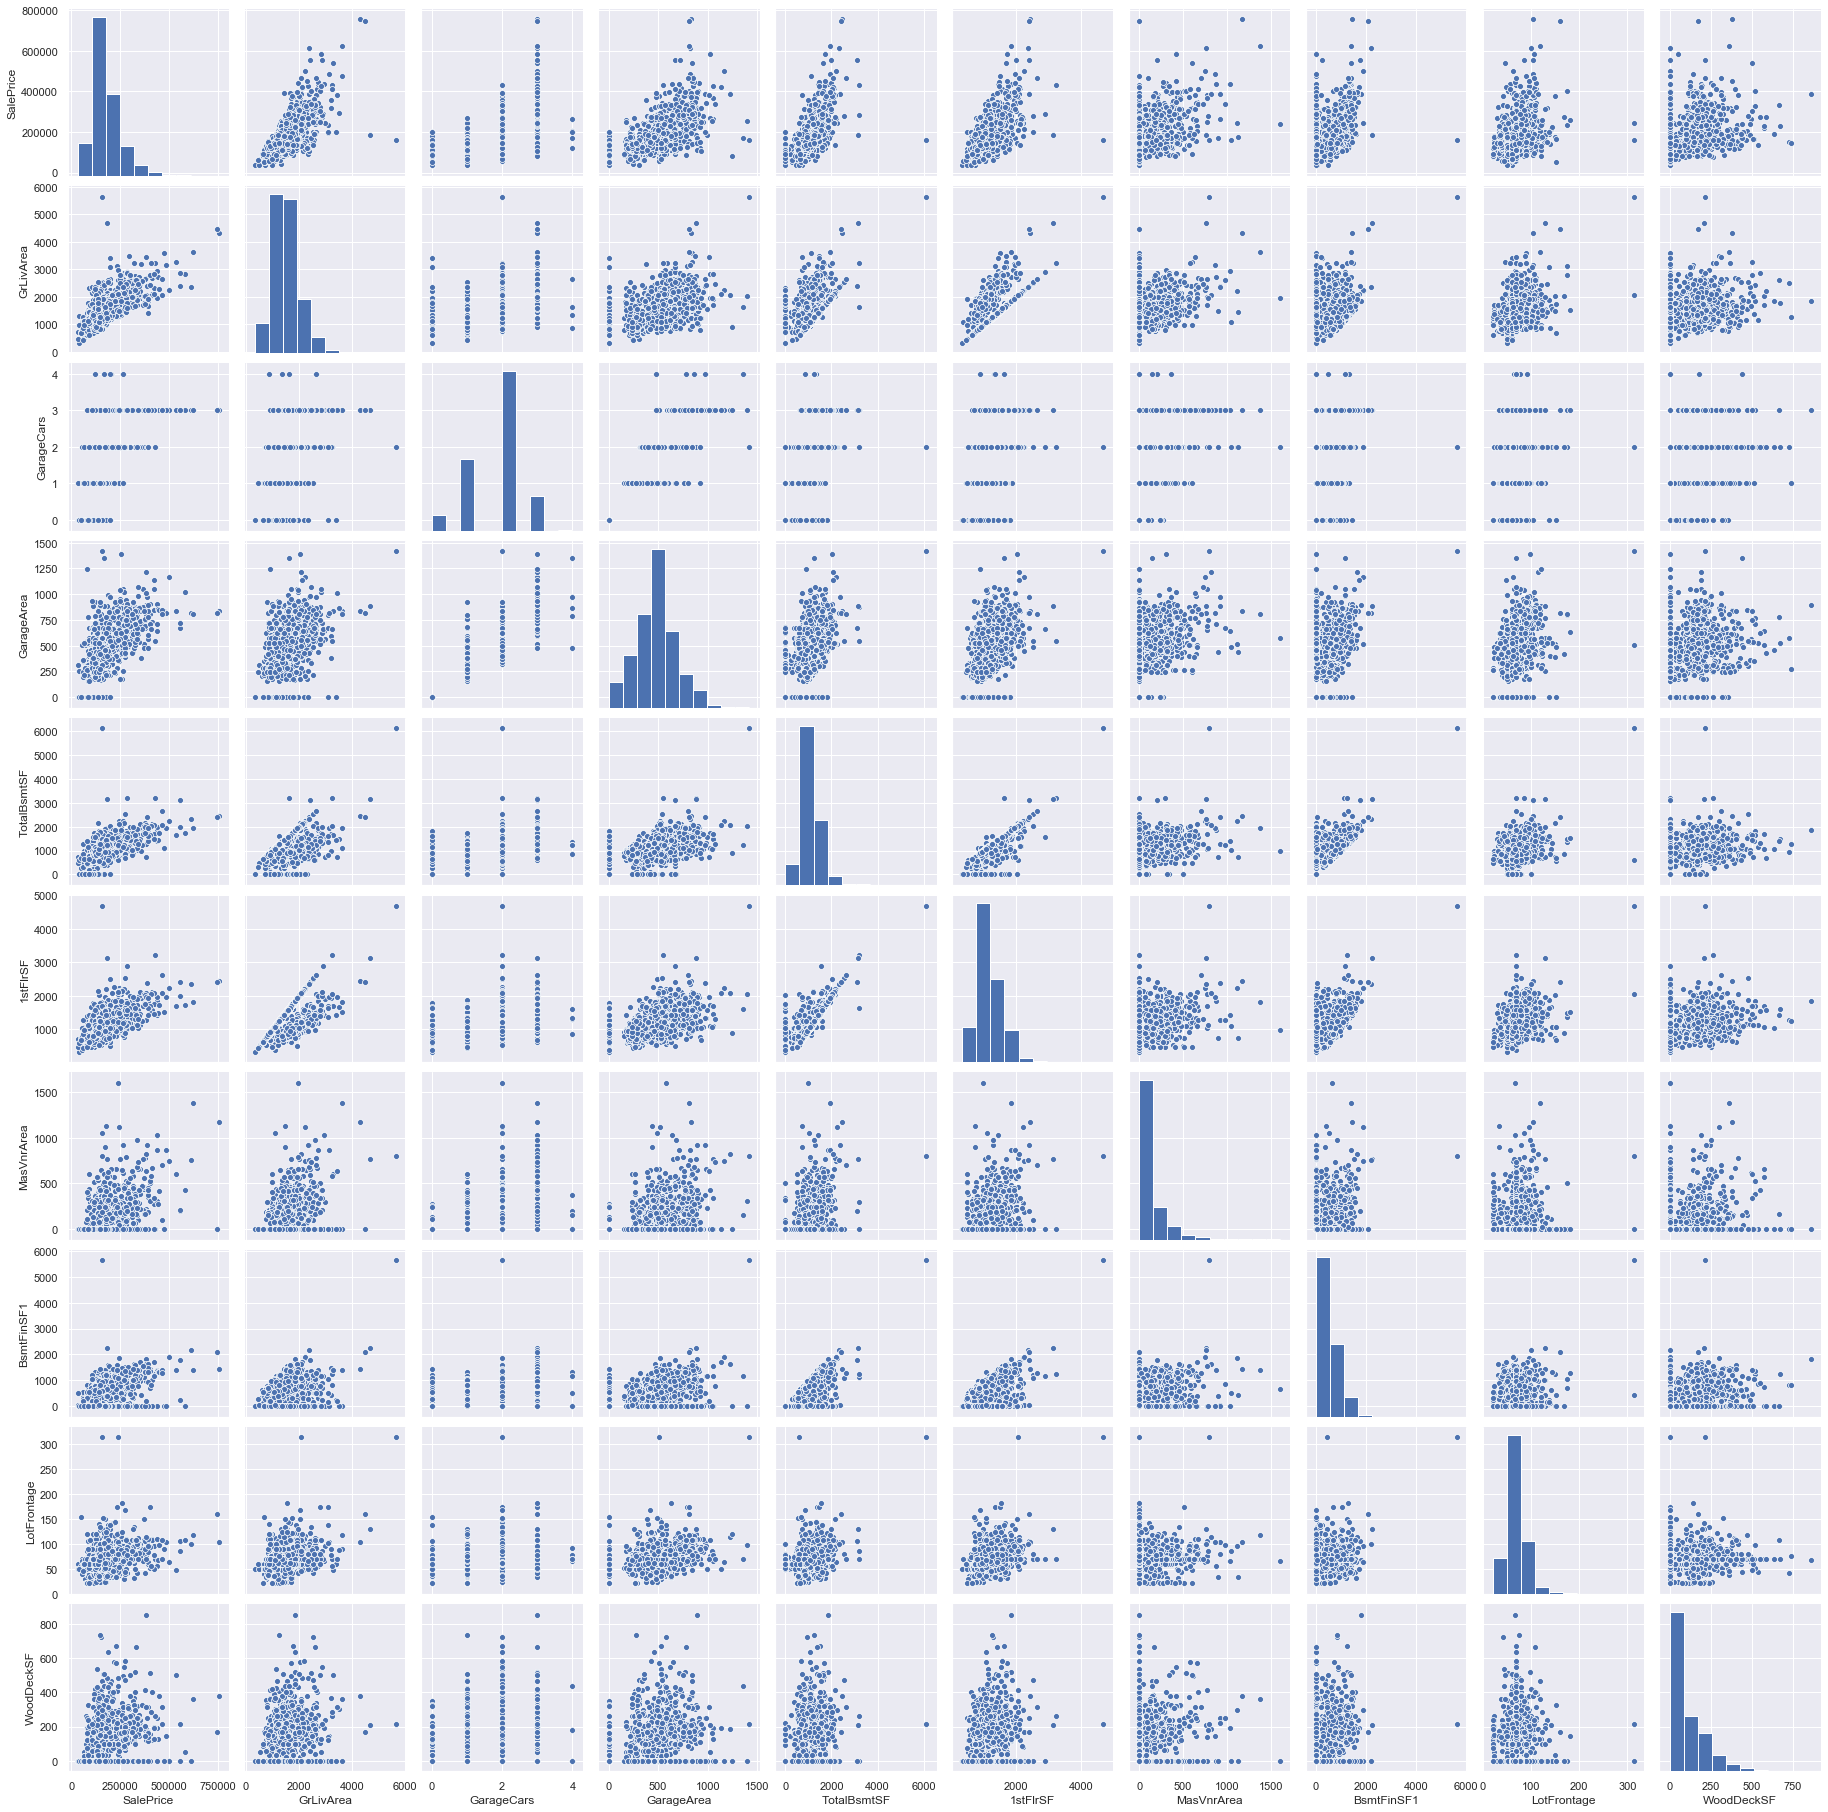

In [58]:
#scatterplot
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
sns.set()
sns.pairplot(data_train[cols], size = 2.5)
plt.show();

**Categorical Analysis**

In [59]:
#Creating a list of all our categorical variables
cat=[]
for col in data_train.columns:
    if data_train[col].dtype=='object':
        cat.append(col)

In [61]:
print("Categorical variables :: \n\n{}".format(cat))

Categorical variables :: 

['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


**Category 1 : Type of dwellings**

In [62]:
cat1 = ['MSSubClass'] # Identifies the type of dwelling(parts for sale by the owner) involved in the sale.

In [72]:
#Converting integer values of MSSubClass to their respective categorical values given in description.
#Create a copy of the dataset and replace all numeric values with their respective categories.
data_train_new = data_train.copy()

data_train_new['MSSubClass'] = data_train_new['MSSubClass'].replace({20:'1_STORY_NEWER',
                                                    30:'1_STORY_OLDER',40:'1_STORY_ATTIC',
                                                    45:'1_1/2_UNFINISHED',
                                                    50:'1_1/2_FINISHED',60:'2_STORY_NEWER',
                                                    70:'2_STORY_OLDER',75:'2_1/2_STOPY',
                                                    80:'SPLIT/MULTILEVEL',85:'SPLIT_FOYER',
                                                    90:'DUPLEX',120:'1_STORY_PUD',
                                                    150:'1_1/2_STORY_PUD',
                                                    160:'2_STORY_PUD',
                                                    180:'PUD_MULTILEVEL',
                                                    190:'2_FAMILY_CONVERSION'})

#Covert to object
data_train_new['MSSubClass'] = data_train_new['MSSubClass'].astype(object)

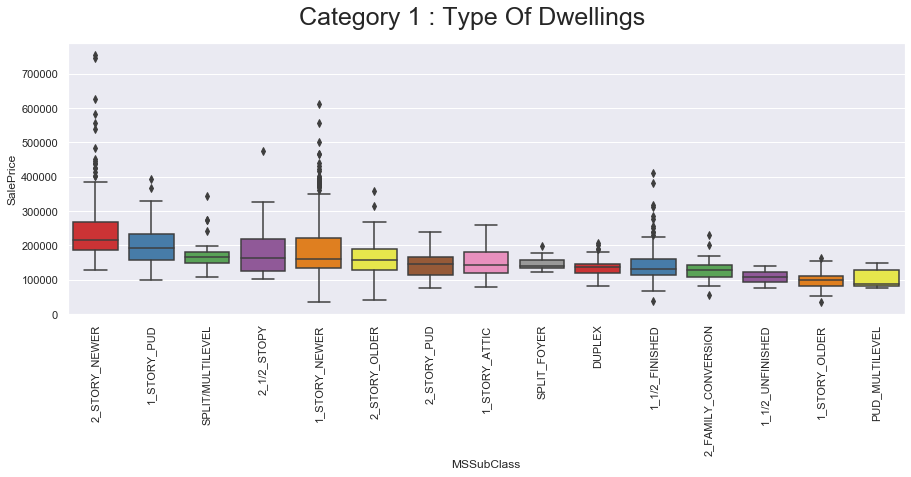

In [64]:
fig=plt.figure(figsize=(15,5))

table = data_train_new.groupby(['MSSubClass'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
ax = sns.boxplot(data=data_train_new,x="MSSubClass",y="SalePrice",order=table['MSSubClass'].to_list(),
                palette="Set1")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
fig.suptitle("Category 1 : Type Of Dwellings",fontsize=25);


In MSSubClass, 

* The Newer 2-STORY and 1-Story PUDs have on average higher sale price than the others.
* There are outliers present in newer sub classes and the one's on the left.
* We can also see there is some non-uniformity in the sub classes by looking at the size of the boxplot.

In [65]:
#This table tells us the count of the above feature in the dataset and calculates average Sale price.
table = data_train_new.groupby(['MSSubClass'])['MSSubClass','SalePrice'].agg({"MSSubClass":"count","SalePrice":"median"})
table = table.sort_values(by="SalePrice",ascending=False)
table.style.background_gradient(cmap="Reds")

Generally:

* The box plot showed us Newer 2-STORY and 1-Story PUDs had the highest average SalePrice.

* The table showed us the most of the data is for 1-STORY-NEWER class and its average price is less than 160000.

* MSSubClass overally is a good feature for predicting Sale Price.

**Category 2 : Structure of Land and Property**

In [66]:
cat2=['MSZoning','Street','LotShape','LandContour','LotConfig','LandSlope']

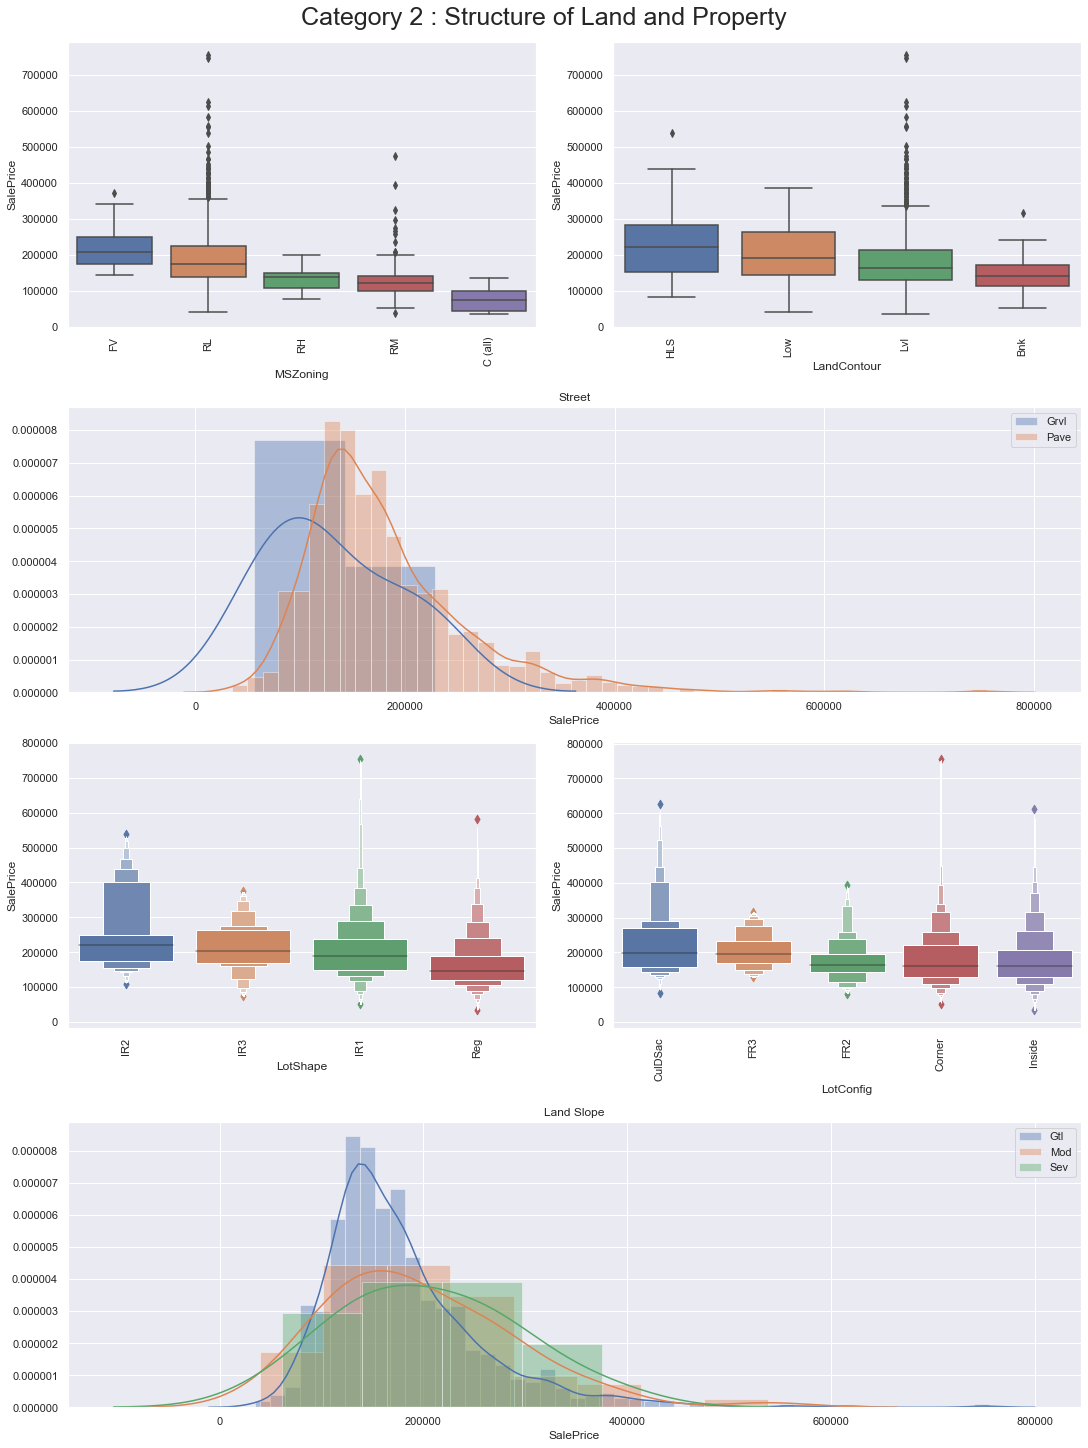

In [67]:
fig = plt.figure(constrained_layout=True,figsize=(15,20))
gs = gridspec.GridSpec(4, 2,figure=fig)

plt.subplot(gs[0,0])
table = data_train.groupby(['MSZoning'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxplot(data=data_train,x='MSZoning',y="SalePrice",order=table['MSZoning'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[0,1])
table = data_train.groupby(['LandContour'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxplot(data=data_train,x='LandContour',y="SalePrice",order=table['LandContour'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[1,:])
a1 = sns.distplot(data_train[data_train['Street']=='Grvl']['SalePrice'])
a1 = sns.distplot(data_train[data_train['Street']=='Pave']['SalePrice'])
plt.legend('upper right' , labels = ['Grvl','Pave'])
plt.xlabel("SalePrice")
plt.title("Street")

plt.subplot(gs[2,0])
table = data_train.groupby(['LotShape'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxenplot(data=data_train,x='LotShape',y="SalePrice",order=table['LotShape'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[2,1])
table = data_train.groupby(['LotConfig'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxenplot(data=data_train,x='LotConfig',y="SalePrice",order=table['LotConfig'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[3,:])
a1 = sns.distplot(data_train[data_train['LandSlope']=='Gtl']['SalePrice'])
a1 = sns.distplot(data_train[data_train['LandSlope']=='Mod']['SalePrice'])
a1 = sns.distplot(data_train[data_train['LandSlope']=='Sev']['SalePrice'])
plt.legend('upper right' , labels = ['Gtl','Mod','Sev'])
plt.xlabel("SalePrice")
plt.title("Land Slope")

fig.suptitle("Category 2 : Structure of Land and Property",fontsize=25);

* MSZoning: Floating Village Residential zone (FV) is having higher Sale Price of around 200k. While Commercial zones are having the lowest Sale Price. It' quite interesting that the value of a house installing at the Vilage residential zone is more expensive than the house in the other zones. Besides that, we see a variation in Sale Price in different zones which makes it an important feature for our prediction.

* LandContour: If the house has significant slope on both sides (HLS) or is nearly flat(Low), Sale Price is more. For Depressed and Banked slopes, Sale price falls down.

* Street : For flat stones or bricks access, Sale Price is higher and majority of houses with gravel and its prices are around 200k. But there is very less data for Gravel street type. This feature is not that good for our prediction.

* LotShape : We can see that houses with regular shapes have low price. And as the irregularity increases, the average sale price of the house also increases.

* LotConfig : The configuration of the lot does not appear to vary the price sginificantly.The properties with Cul de Sac(street or passage closed at one end) and FR3(Frontage on 3 sides of property) configuration on average are having high value than the other configurations.

* LandSlope : Most of the properties are having gentle slope and are lowest priced , while properties having moderate or severe slope have higher value.

**Category 3 :: Overall Quality and Condition**

In [68]:
cat3=['OverallQual','OverallCond']

In [69]:
#Changing Overall quality and condition's values to categorical values
#OverallQual: Rates the overall material and finish of the house
   
data_train_new['OverallQual'] = data_train_new['OverallQual'].replace({10:'Very Exc',9:'Exc',8:'VG',7:'Good',
                                                      6:'Abv Avg',5:'Avg',4:'Bel Avg',3:'Fair',
                                                      2:'Poor',1:'Very Poor'})

#Covert to object
data_train_new['OverallQual'] = data_train_new['OverallQual'].astype(object)

#OverallCond: Rates the overall condition of the house

data_train_new['OverallCond'] = data_train_new['OverallCond'].replace({10:'Very Exc',9:'Exc',8:'VG',7:'Good',
                                                      6:'Abv Avg',5:'Avg',4:'Bel Avg',3:'Fair',
                                                      2:'Poor',1:'Very Poor'})

#Covert to object
data_train_new['OverallCond'] = data_train_new['OverallCond'].astype(object)

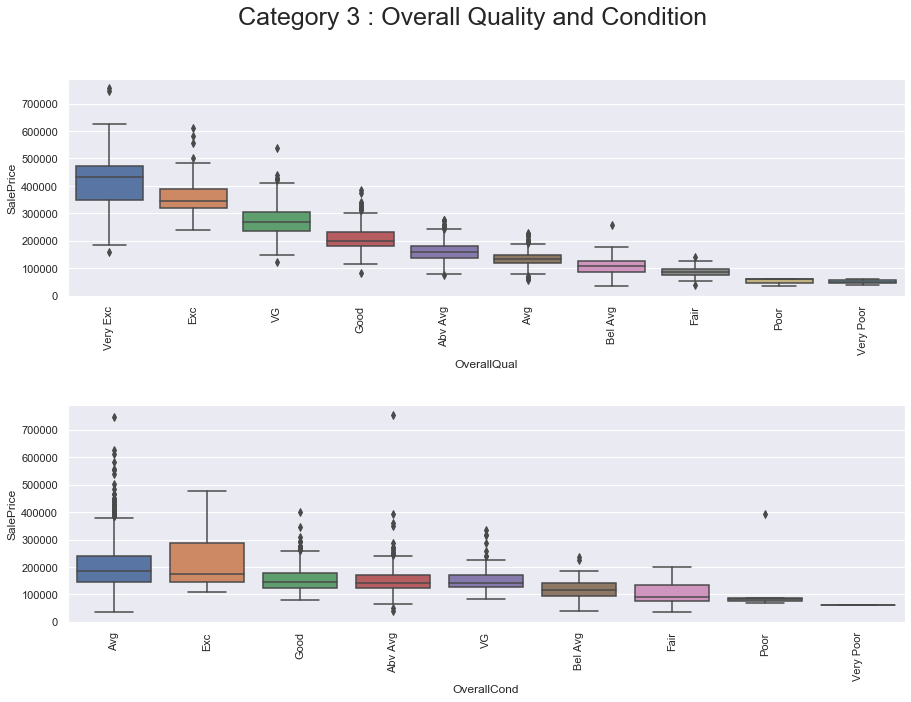

In [70]:
fig = plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

plt.subplot(2,1,1)
table = data_train_new.groupby(['OverallQual'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxplot(data=data_train_new,x='OverallQual',y="SalePrice",order=table['OverallQual'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(2,1,2)
table = data_train_new.groupby(['OverallCond'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxplot(data=data_train_new,x='OverallCond',y="SalePrice",order=table['OverallCond'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

fig.suptitle("Category 3 : Overall Quality and Condition",fontsize=25);

* Overall Quality : It's obvious that if overall quality of the property is good, the Sale Price will be high and we can clearly see that in the above box plot. This tells us that Overall Quality is an important feature in predicting Sale Price of the house. The below distribution gives us a better look of the variation in price with the overall quality.

* Overall Condition : Most of the houses are in average condition and very few are in excellent condition as seen in the box plot and the below distribution. Properties in average and excellent condition are having average price high and the properties in very bad condition will have low sale price. It makes sense. 

In [73]:
fig = px.histogram(data_train_new, x="SalePrice", color='OverallQual',barmode="overlay",title="Overall Quality of the house")
fig.update_layout(height=500)
fig.show()

fig = px.histogram(data_train_new, x="SalePrice", color='OverallCond',barmode="overlay",title="Overall Condition of the house")
fig.update_layout(height=500)
fig.show()

**Category 4 :: Location and Style**

In [72]:
cat4=['Neighborhood','Condition1', 'Condition2','Utilities','BldgType', 'HouseStyle']

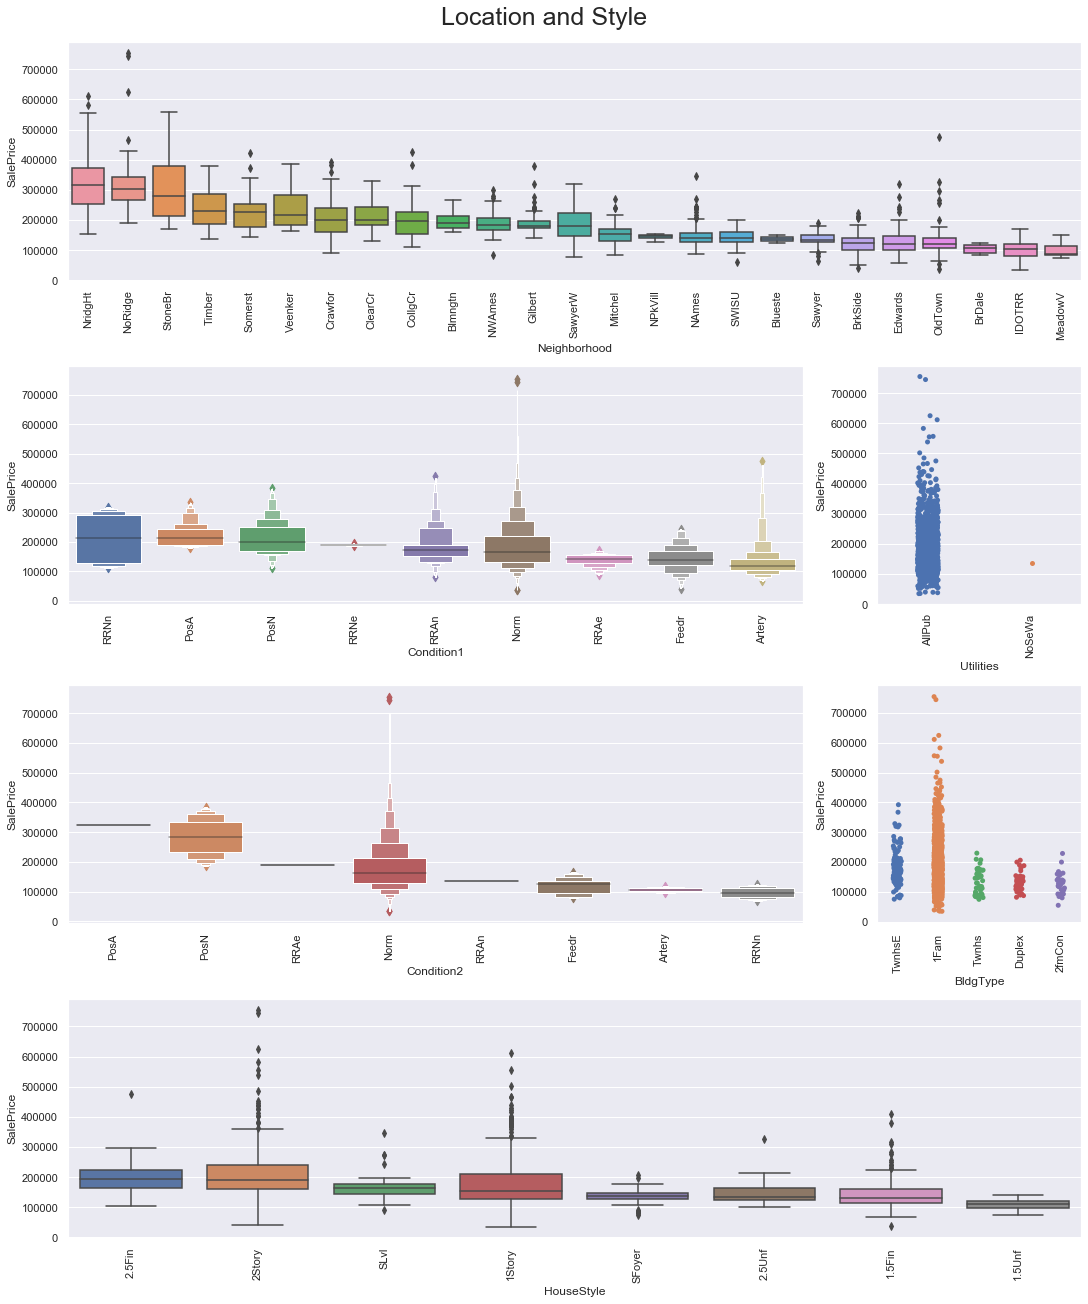

In [73]:
fig = plt.figure(constrained_layout=True,figsize=(15,18))
gs = GridSpec(4, 3, figure=fig)

plt.subplot(gs[0,:])
table = data_train.groupby(['Neighborhood'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxplot(data=data_train,x='Neighborhood',y="SalePrice",order=table['Neighborhood'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[1,:-1])
table = data_train.groupby(['Condition1'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxenplot(data=data_train,x='Condition1',y="SalePrice",order=table['Condition1'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[1,-1])
table = data_train.groupby(['Utilities'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.stripplot(data=data_train,x='Utilities',y="SalePrice",order=table['Utilities'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[2,:-1])
table = data_train.groupby(['Condition2'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxenplot(data=data_train,x='Condition2',y="SalePrice",order=table['Condition2'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[2,-1])
table = data_train.groupby(['BldgType'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.stripplot(data=data_train,x='BldgType',y="SalePrice",order=table['BldgType'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[3,:])
table = data_train.groupby(['HouseStyle'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxplot(data=data_train,x='HouseStyle',y="SalePrice",order=table['HouseStyle'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

fig.suptitle("Location and Style",fontsize=25);

* Building Type : Single family detached dwellings have higher sale price compared to duplex,two family houses and townhouse dwellings

* Condition 1 and 2 : In Condition 1 and 2 , close proximity to conditions like streets lowers the sale price and to railroads ,price is high.

* House Styles : 2 Story and 1 Story finished house styles have highest sale price than unfinished properties which is obvious.

* Neighborhood :- We can see variation in sale price in different neighborhoods.From Mitchell neighborhoods , all the neighbors to the right are having consistently low price.

The below table gives us a proper view of the neighborhoods and their average sale price.

In [74]:
table = data_train_new.groupby(['Neighborhood'],as_index=False)['SalePrice'].median()
table = table.sort_values(by='SalePrice',ascending=False)
table.style.background_gradient(cmap='Reds')

**Category 5 :: Roofing,Foundation and housing exterior**

In [75]:
cat5=['RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd','MasVnrType', 'Foundation']

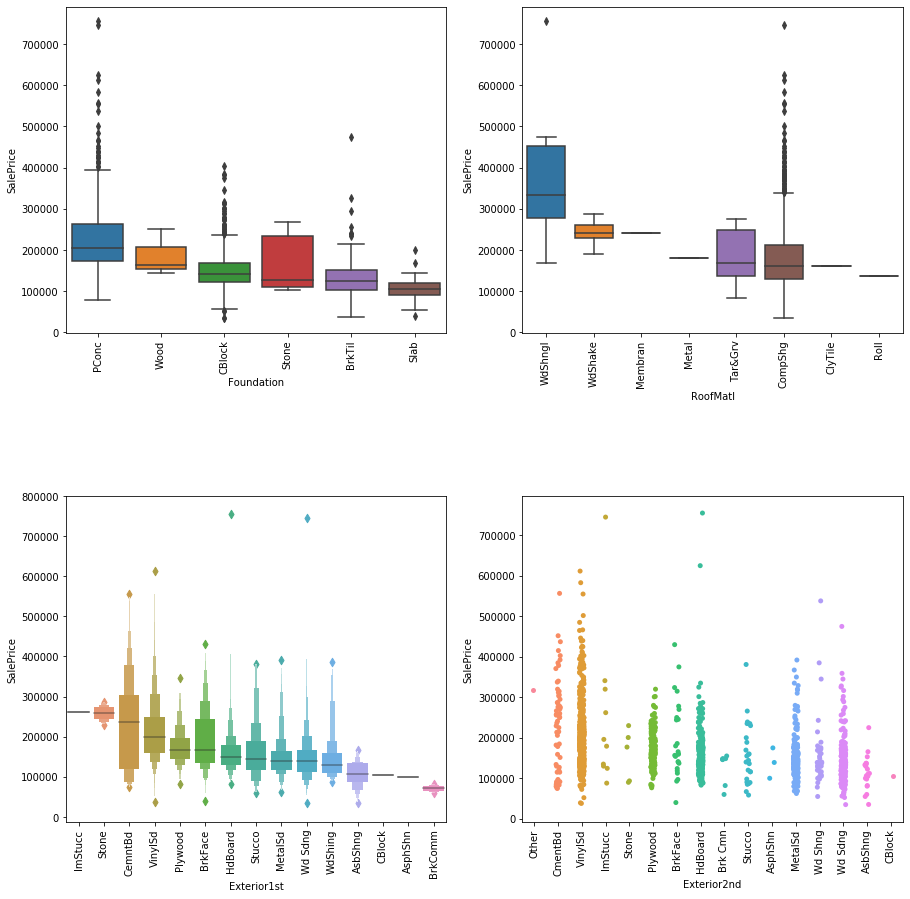

In [74]:
fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace=0.5)

plt.subplot(2,2,1)
table = data_train.groupby(['Foundation'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxplot(data=data_train,x='Foundation',y="SalePrice",order=table['Foundation'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(2,2,2)
table = data_train.groupby(['RoofMatl'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxplot(data=data_train,x='RoofMatl',y="SalePrice",order=table['RoofMatl'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(2,2,3)
table = data_train.groupby(['Exterior1st'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxenplot(data=data_train,x='Exterior1st',y="SalePrice",order=table['Exterior1st'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(2,2,4)
table = data_train.groupby(['Exterior2nd'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.stripplot(data=data_train,x='Exterior2nd',y="SalePrice",order=table['Exterior2nd'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

fig = px.histogram(data_train, x="SalePrice", color='RoofStyle',barmode="overlay",title='RoofStyle')
fig.update_layout(height=400)
fig.show()

fig = px.histogram(data_train, x="SalePrice", color='MasVnrType',barmode="overlay",title="Mason Veneer Type")
fig.update_layout(height=400)
fig.show()

* Exterior 1st : We can see a difference in Sale Price in exterior covering of the house. Imitation Stucco,Stone,Cement Board coverings have high value in determining sale price ,while the lowest value is for common brick covering.

* Exterior2nd : Having multiple materials changes the price of the house.Stone value has dropped while Cement board and Vinyl Siding are having almost same price.

* Roof Styles : Most of the house are having Gable and Hip roof styles and average sale price of 150k.

The average highest sale price is for properties having Shed roof style and the lowest sale price.

In [77]:
table = data_train_new.groupby(['RoofStyle'],as_index=False)['SalePrice'].median()
table = table.sort_values(by='SalePrice',ascending=False)
table.style.background_gradient(cmap='Reds')

* Mason Veneer Types : Most of the properties are not having Masonry veneer walls and have low sale price. Properties having masonry walls of Stone and Bricks have high value with Stone being highest.

In [78]:
table = data_train_new.groupby(['MasVnrType'],as_index=False)['SalePrice'].median()
table = table.sort_values(by='SalePrice',ascending=False)
table.style.background_gradient(cmap='Greys')

* Foundation : Houses with poured concrete foundation have highest sale price followed by wooden and concrete block.

* Slab foundation having the lowest value.

* Roof Material : Almost all the properties in our data have standard shingle roof material with average sale price of 160k.

* The highest average value is for wooden shingles materials and the lowest for roll roof materials.

**Category 6 :: Exterior Condition and Quality**

In [75]:
cat6=['ExterQual', 'ExterCond']

In [76]:
fig = px.histogram(data_train, x="SalePrice", color='ExterQual',barmode="overlay",title='Exterior Quality')
fig.update_layout(height=400)
fig.show()

fig = px.histogram(data_train, x="SalePrice", color='ExterCond',barmode="overlay",title="Exterior Condition")
fig.update_layout(height=400)
fig.show()

* Exterior Quality : If the exterior quality is good or excellent, the price will be more. Most of the properties have average exterior quality and very few have excellent exterior quality.

* Exterior Condition : Average,good and excellent exterior condition properties will have higher sale price. And here also most of the properties have average exterior condition and only 3 

**Category 7 :: Basements**

In [81]:
cat7=['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

In [77]:
fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Box(y=data_train['SalePrice'],x=data_train['BsmtQual'],name='Basement Quality'),row=1,col=1)
fig.add_trace(go.Box(y=data_train['SalePrice'],x=data_train['BsmtExposure'],name='Basement Exposure'),row=1,col=2)
fig.update_layout( title_text="Basement Quality and Exposure",height=400)
fig.show()

fig = px.histogram(data_train, x="SalePrice", color='BsmtCond',barmode="overlay",height=400,title='Basement Condition')
fig.show()

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Violin(y=data_train['SalePrice'],x=data_train['BsmtFinType1'],name='Basement_Finish Type1 '),row=1,col=1)
fig.add_trace(go.Violin(y=data_train['SalePrice'],x=data_train['BsmtFinType2'],name='Basement_Finish Type2'),row=1,col=2)
fig.update_layout( title_text="Basement Finish Type 1 and 2",height=400)
fig.show()

* Basement Quality : Here the Basement quality refers to height of the basement.So excellent means more than 100 inches and poor means less than 70 inches. So Properties with excellent and good basement quality will have higher sale price.

* Basement Exposure : Basements with good exposure to garden or walkouts have higher sale price and properties with no basements or the ones which are not known have low sale price. Both of the above features help us in predicting Sale Price as we can see variation in Sale Price.

* Basement Condition : Average and Good condition have higher sale price as seen in other cases.

* Basment finish type 1 and 2 : Good and Average living quarters and unfinished basements have higher average sale price in both type 1 and type 2 and below average finishes will obviously have less value.

**Category 8 :: Heating and Air Conditioning**

In [83]:
cat8=['Heating', 'HeatingQC', 'CentralAir','Electrical']

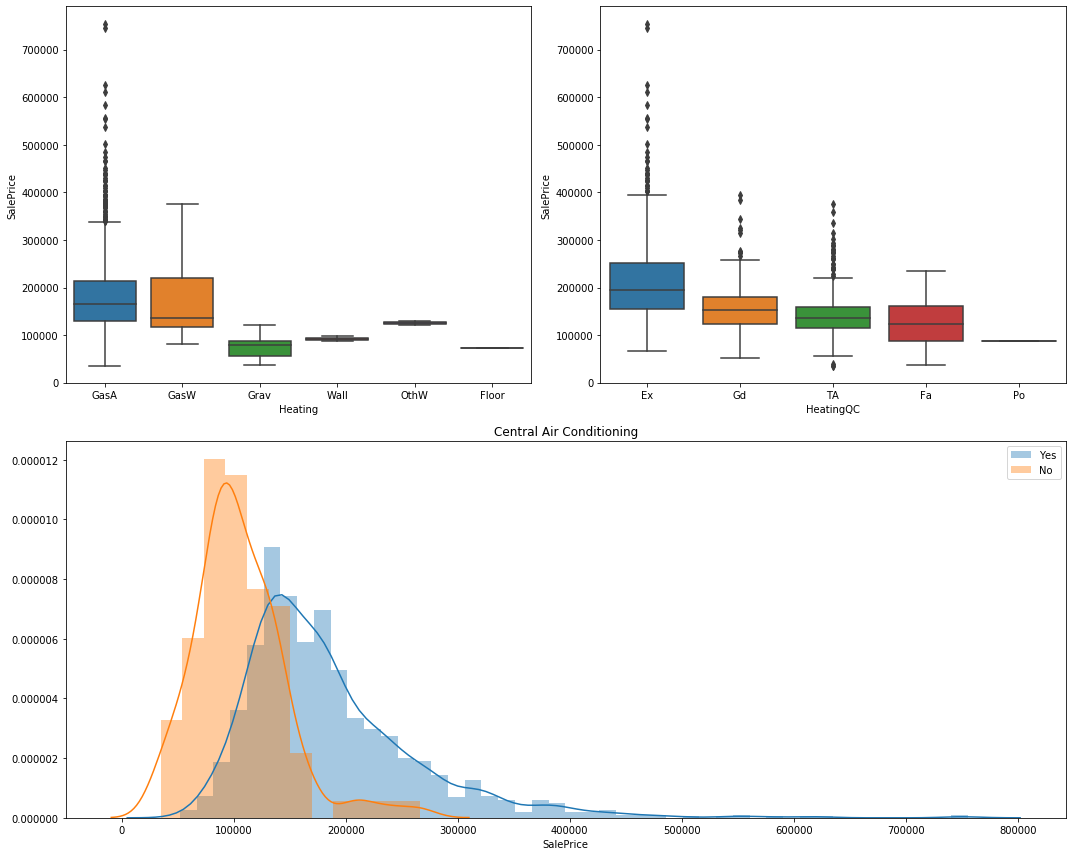

In [78]:
import matplotlib.gridspec as gridspec

fig = plt.figure(tight_layout=True,figsize=(15,12))
gs = gridspec.GridSpec(2, 2)

plt.subplot(gs[0,0])
ax1 = sns.boxplot(data=data_train,x="Heating",y="SalePrice")

plt.subplot(gs[0,1])
ax1 = sns.boxplot(data=data_train,x="HeatingQC",y="SalePrice")

plt.subplot(gs[1,:])
sns.distplot(data_train[data_train['CentralAir']=='Y']['SalePrice'])
sns.distplot(data_train[data_train['CentralAir']=='N']['SalePrice'])
plt.legend('upper right' , labels = ['Yes','No'])
plt.xlabel("SalePrice")
plt.title("Central Air Conditioning")

px.histogram(data_train, x="SalePrice", color='Electrical',barmode="overlay",title="Electrical System")

* Electrical :- Most of the properties have standard circuit breakers and having highest average sale price of 170000. Properties with Poor fuse box system and mixed system have less than 10000 sale price.
* Heating Quality : It can be clearly seen in the box plot and no need of explanation.
* Heating : Heating in the wall or hot water / steam is associated with very low house prices. Gas formed warm air appears to drive a higher sales price.
* Central AC : It's straightforward ,the properties which have Air conditioning will have higher price than the ones which dont have.

**Category 9 :: Internal Quality**

In [85]:
cat9=['KitchenQual', 'Functional','FireplaceQu']

In [79]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Violin(y=data_train['SalePrice'],x=data_train['FireplaceQu'],name='Fireplace Quality'),row=1,col=1)
fig.add_trace(go.Box(y=data_train['SalePrice'],x=data_train['KitchenQual'],name='Kitchen Quality'),row=1,col=2)
fig.update_layout( showlegend=True,title_text="Fireplace and Kitchen Quality")
fig.show()

fig = px.histogram(data_train, x="SalePrice", color='Functional',barmode="overlay",title="Functional")
fig.show()

* No need to study about kitchen and fireplace quality
* Functional : Functional feature tells us about the home functionality.So we can see that typical functionality is seen in most of the properties in our dataset.
* Typical functionality having highest value for sale price and as functionality decreases , sale price also decreases.

**Category 10 :: Garage**

In [ ]:
cat10=['GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond']

In [ ]:
fig = plt.figure(constrained_layout=True,figsize=(15,15))
gs = GridSpec(3, 3, figure=fig)

plt.subplot(gs[0,:])
a1 = sns.boxenplot(data=data_train,x="GarageType",y="SalePrice")
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[1,:-1])
sns.distplot(data_train[data_train['GarageFinish']=='RFn']['SalePrice'])
sns.distplot(data_train[data_train['GarageFinish']=='Unf']['SalePrice'])
sns.distplot(data_train[data_train['GarageFinish']=='Fin']['SalePrice'])
sns.distplot(data_train[data_train['GarageFinish']=='Not Known']['SalePrice'])

plt.legend('upper right' , labels = ['RFn','Unf','Fin','Not Known'])
plt.xlabel("SalePrice")
plt.title("Garage Finish")

plt.subplot(gs[1:,-1])
a1 = sns.boxplot(data=data_train,x="GarageCars",y="SalePrice")
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[-1,0])
a1 = sns.stripplot(data=data_train,x="GarageQual",y="SalePrice")
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[-1,-2])
a1 = sns.stripplot(data=data_train,x="GarageCond",y="SalePrice")
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

* Garage Type : Houses with built in or attached garages tend to have the highest prices. Those without a garage or a car port tend to have the lowest price.

* Garage Finish :Finished and roughly finished garages account for higher sale price than unfinished ones.And the properties which dont have a garage have the lowest price.

* GarageCars :Here garage cars refers to size of garage in car capacity.So higher the number more the Sale Price.

**Category 11 : Outdoors**

In [ ]:
cat11 = ['PavedDrive']

In [ ]:
px.histogram(data_train, x="SalePrice", color='PavedDrive',barmode="overlay",title="Paved Driveway")

* Paved Driveway :Most of the houses have Paved driveway in our dataset and these properties have highest sale price than partial and dirt/gravel driveways.

**Category 12 :: Sale Type and Condition**

In [ ]:
cat12 = ['SaleType','SaleCondition']

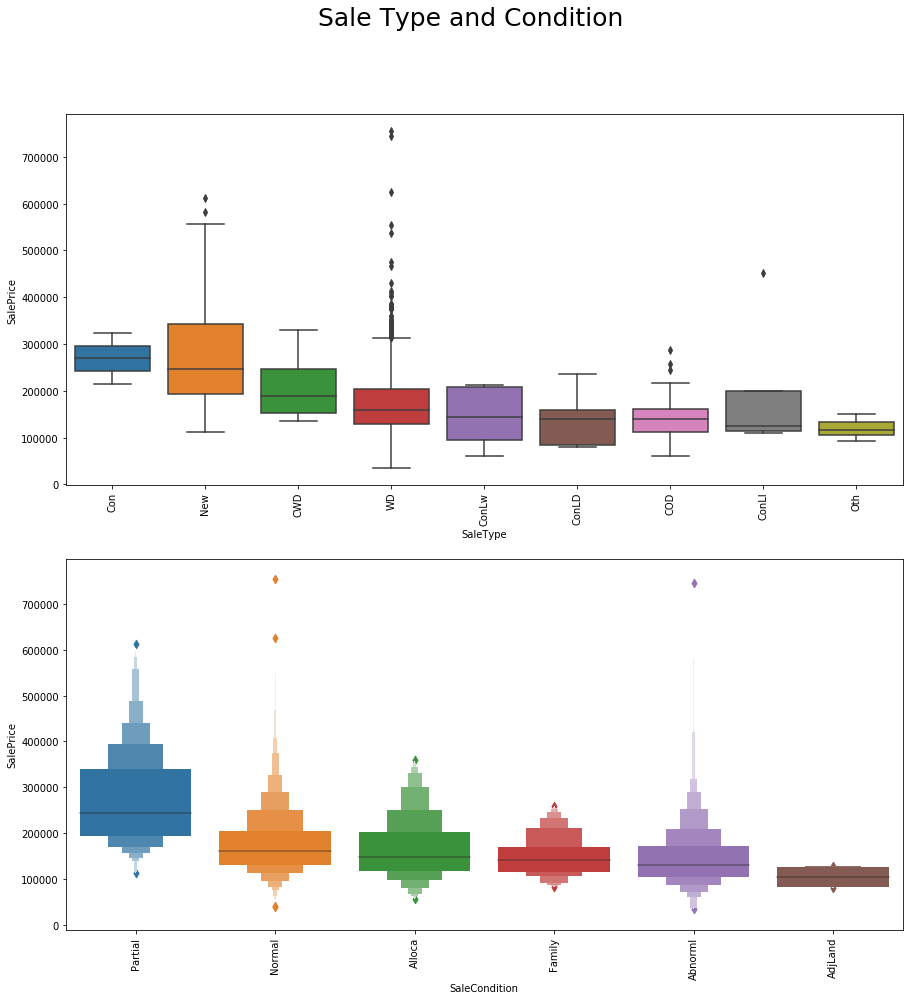

In [80]:
fig = plt.figure(figsize=(15,15))

plt.subplot(2,1,1)
table = data_train.groupby(['SaleType'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxplot(data=data_train,x='SaleType',y="SalePrice",order=table['SaleType'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(2,1,2)
table = data_train.groupby(['SaleCondition'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxenplot(data=data_train,x='SaleCondition',y="SalePrice",order=table['SaleCondition'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

fig.suptitle("Sale Type and Condition",fontsize=25);

* Both the variables above exhibit variation in sales price across the levels.

* Sale Type : Most of the properties are on warranty deed sale.The manor in which the house is sold appears to have different price ranges.

* Sale Condition : If the house to be sold is in partial or normal condition , the price will definitely be higher than the rest of the conditions.

Based on the analysis of the above categorical features , we can conclude that the following features are important in predicting Sale Price

* MSSubClass and MSZoning.
* All the Quality features , as the houses with average ,good,excellent quality features will have higher Sale Price.
* Fireplaces and Garage Cars, more the number , higher the Sale Price.
* We also saw variation in Basement Exposure.
* And lastly Sale Type and Sale condition are also one of the important features..

**Datetime Features**

We have four year features in our dataset.

* YearBuilt
* YearRemodAdd
* GarageYrBlt
* YrSold

We will analyze these features with Sale Price and try to gather some information.

In [81]:
year_features = ['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt']

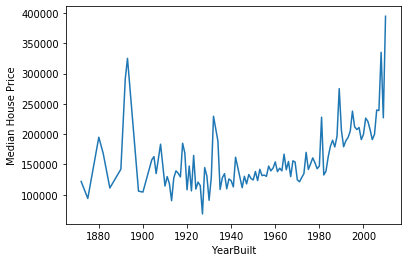

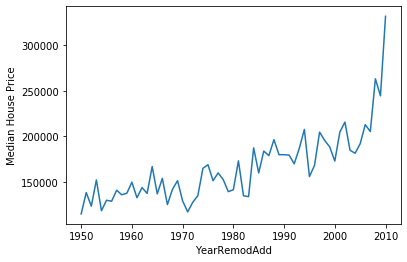

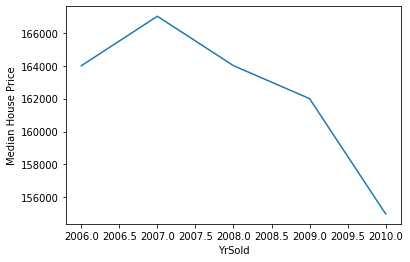

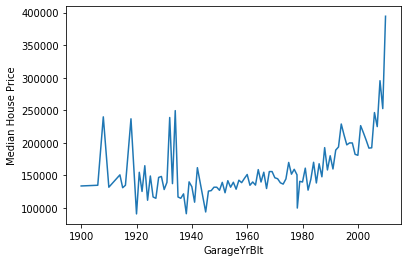

In [82]:
year_features = ['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt']

for feature in year_features:
    ax = data_train.groupby([feature])['SalePrice'].median().plot()
    plt.ylabel("Median House Price")
    plt.show()

* We can see that the houses and garage which were built and remoddeled during 90s have less Sale Price than the newer ones.
* With every year , House price increases.
* But if see ,Year Sold feature the Price falls down with each year which is strange.
* Let's do some further analysis on these features.

* Due to the strange behaviour in Year Sold, we subtract each feature with Year Sold.
* i.e We are subtracting the year when the house was built with the year it was sold and comparing it with the Sale price.

In [83]:
data=data_train.copy()
data['Sold-Built'] = data['YrSold'] - data['YearBuilt']
fig=px.scatter(data,x="Sold-Built",y="SalePrice",width=700)
fig.show()

data=data_train.copy()
data['Sold-Remodelled'] = data['YrSold'] - data['YearRemodAdd']
fig=px.scatter(data,x="Sold-Remodelled",y="SalePrice",width=700)
fig.show()

data=data_train.copy()
data['Sold-GarageBuilt'] = data['YrSold'] - data['GarageYrBlt']
fig=px.scatter(data,x="Sold-GarageBuilt",y="SalePrice",width=700)
fig.show()

* This clearly shows that the more the house is old , less is the Sale Price.

Now we'll make a predictive model for predicting Sale Price, First we'll deal with features with highly skewed values by using the Log Transformation.

* As our target feature is a continuous variable , we'll be using regression algorithms for prediction.
* And for regression, it is convenient to transform highly skewed variables into a more normalized dataset.

In [22]:
#create a coppy train data
import copy
dataset = data_train.copy()

Recall that we have changed some int features into object features, so now we need to convert few features datatypes back to int from object.

In [23]:
object_to_int = ['MSSubClass','OverallQual','OverallCond']

for feature in object_to_int:
    dataset[feature] = dataset[feature].astype(int)

In [24]:
#we do similarly in the test set (data_test)
data_test['MSSubClass'] = data_test['MSSubClass'].astype(int)
data_test['OverallQual'] = data_test['OverallQual'].astype(int)
data_test['OverallCond'] = data_test['OverallCond'].astype(int)

In [25]:
#We are extracting the features from the dataset with high skewness for applying log transformation.
datetime=['YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold']

#Extract continuous variables from the dataset
#we only consider continuous numerical variables (not discrete variables) 
continuous=[]
for col in dataset.columns:
    if dataset[col].dtype!='O' and len(dataset[col].unique()) >16 and col not in datetime:
        continuous.append(col)
        
#Extracting features with skewness more than and less than zero
skewed_features=[]
for col in continuous:
    if dataset[col].skew()>0 or dataset[col].skew()<0:
        skewed_features.append(col)


In [26]:
#Creating a final list of continuous numerical features for applying log transformation
apply_log=[]
for col in skewed_features:
    if 0 not in dataset[col].unique():
        apply_log.append(col)
print("List of continuous numerical variablesnumericall need to apply log transformation :: \n\n{}".format(apply_log))

List of continuous numerical variablesnumericall need to apply log transformation :: 

['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']


In [27]:
#Before log transformation
print("Before Log Transformation........................")
for col in apply_log:
    print("{} --- {}".format(col,dataset[col].skew()))
    
#Applying log transformation
for feature in apply_log:
    dataset[feature]=np.log(dataset[feature])
    
#After log transformation
print("\nAfter Log Transformation.........................")
for col in apply_log:
    print("{} --- {}".format(col,dataset[col].skew()))

Before Log Transformation........................
LotFrontage --- 2.402352471321692
LotArea --- 12.207687851233496
1stFlrSF --- 1.3767566220336365
GrLivArea --- 1.3665603560164552
SalePrice --- 1.8828757597682129

After Log Transformation.........................
LotFrontage --- -0.9155903146891217
LotArea --- -0.1379938086958118
1stFlrSF --- 0.07915695223960692
GrLivArea --- -0.006995182187690808
SalePrice --- 0.12133506220520406


* We can see the skewness has reduced after applying log transformation.
* Look at the distribution of these five features.

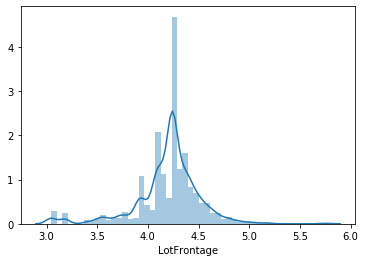

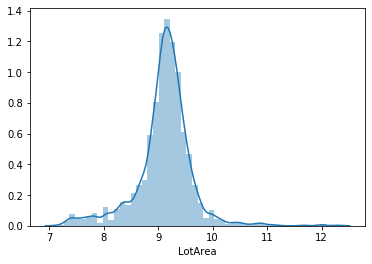

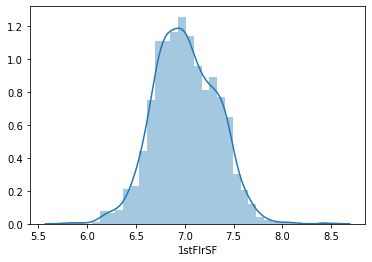

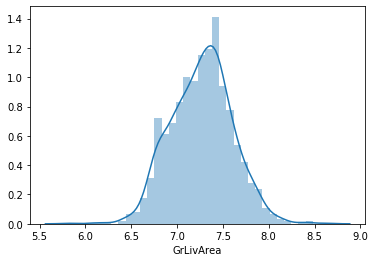

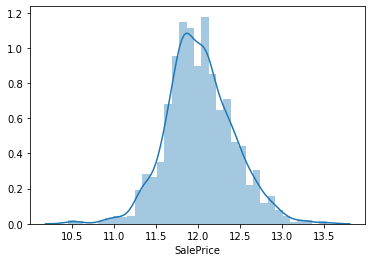

In [84]:
for feature in apply_log:
    fig = sns.distplot(dataset[feature])
    plt.show()

**Label encoding**


It is important to convert the categorical text data into model-understandable numerical data

In [28]:
#Extracting all the categorical data to be encoded into numerical data
categorical = []

for col in dataset.columns:
    if dataset[col].dtype=='O':
        categorical.append(col)

In [29]:
##Label Encoding
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()

label_encoders = {}
for column in categorical:
    label_encoders[column] = LabelEncoder()
    dataset[column] = label_encoders[column].fit_transform(dataset[column])

In [30]:
##Label Encoding for test dataset
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()

label_encoders = {}
for column in categorical:
    label_encoders[column] = LabelEncoder()
    data_test[column] = label_encoders[column].fit_transform(data_test[column])

Let's take a look at the train and test sets to see all the categorical features changed to the numerical features now

In [31]:
dataset[categorical]

MSZoning  Street  LotShape  LandContour  Utilities  LotConfig  \
0            3       1         3            3          0          4   
1            3       1         3            3          0          2   
2            3       1         0            3          0          4   
3            3       1         0            3          0          0   
4            3       1         0            3          0          2   
...        ...     ...       ...          ...        ...        ...   
1455         3       1         3            3          0          4   
1456         3       1         3            3          0          4   
1457         3       1         3            3          0          4   
1458         3       1         3            3          0          4   
1459         3       1         3            3          0          4   

      LandSlope  Neighborhood  Condition1  Condition2  ...  KitchenQual  \
0             0             5           2           2  ...            2   
1             0            24           1           2  ...            3   
2             0             5           2           2  ...            2   
3             0             6           2           2  ...            2   
4             0            15           2           2  ...            2   
...         ...           ...         ...         ...  ...          ...   
1455          0             8           2           2  ...            3   
1456          0            14           2           2  ...            3   
1457          0             6           2           2  ...            2   
1458          0            12           2           2  ...            2   
1459          0             7           2           2  ...            3   

      Functional  FireplaceQu  GarageType  GarageFinish  GarageQual  \
0              6            3           1             2           5   
1              6            5           1             2           5   
2              6            5           1             2           5   
3              6            2           5             3           5   
4              6            5           1             2           5   
...          ...          ...         ...           ...         ...   
1455           6            5           1             2           5   
1456           2            5           1             3           5   
1457           6            2           1             2           5   
1458           6            3           1             3           5   
1459           6            3           1             0           5   

      GarageCond  PavedDrive  SaleType  SaleCondition  
0              5           2         8              4  
1              5           2         8              4  
2              5           2         8              4  
3              5           2         8              0  
4              5           2         8              4  
...          ...         ...       ...            ...  
1455           5           2         8              4  
1456           5           2         8              4  
1457           5           2         8              4  
1458           5           2         8              4  
1459           5           2         8              4  

[1460 rows x 39 columns]

In [32]:
data_test[categorical]

MSZoning  Street  LotShape  LandContour  Utilities  LotConfig  \
1461         3       1         0            3          0          0   
1462         3       1         0            3          0          4   
1463         3       1         0            3          0          4   
1464         3       1         0            1          0          4   
1465         3       1         0            3          0          0   
...        ...     ...       ...          ...        ...        ...   
2914         4       1         3            3          0          4   
2915         4       1         3            3          0          4   
2916         3       1         3            3          0          4   
2917         3       1         3            3          0          4   
2918         3       1         3            3          0          4   

      LandSlope  Neighborhood  Condition1  Condition2  ...  KitchenQual  \
1461          0            12           2           2  ...            2   
1462          0             8           2           2  ...            3   
1463          0             8           2           2  ...            2   
1464          0            22           2           2  ...            2   
1465          0             8           2           2  ...            3   
...         ...           ...         ...         ...  ...          ...   
2914          0            10           2           2  ...            3   
2915          0            10           2           2  ...            3   
2916          0            11           2           2  ...            3   
2917          0            11           2           2  ...            3   
2918          1            11           2           2  ...            3   

      Functional  FireplaceQu  GarageType  GarageFinish  GarageQual  \
1461           6            3           1             3           4   
1462           6            5           1             0           4   
1463           6            2           1             0           4   
1464           6            3           1             2           4   
1465           6            5           1             0           4   
...          ...          ...         ...           ...         ...   
2914           6            3           6             1           2   
2915           6            3           4             3           4   
2916           6            5           5             3           4   
2917           6            3           6             1           2   
2918           6            5           1             0           4   

      GarageCond  PavedDrive  SaleType  SaleCondition  
1461           5           2         8              4  
1462           5           2         8              4  
1463           5           2         8              4  
1464           5           2         8              4  
1465           5           2         8              4  
...          ...         ...       ...            ...  
2914           3           2         8              4  
2915           5           2         8              0  
2916           5           2         8              0  
2917           3           2         8              4  
2918           5           2         8              4  

[1458 rows x 39 columns]

**Feature Scaling**

In [32]:
#Separating target feature and independent variables from the dataset.
y=dataset['SalePrice']
X=dataset.drop(columns=['SalePrice'],axis=1)

columns_x=X.columns

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X=scaler.fit_transform(X)

X = pd.DataFrame(X,columns=[columns_x])

In [34]:
X.head()

Id MSSubClass MSZoning LotFrontage   LotArea Street LotShape  \
0  0.000000   0.235294     0.75    0.418208  0.366344    1.0      1.0   
1  0.000685   0.000000     0.75    0.495064  0.391317    1.0      1.0   
2  0.001371   0.235294     0.75    0.434909  0.422359    1.0      0.0   
3  0.002056   0.294118     0.75    0.388581  0.390295    1.0      0.0   
4  0.002742   0.235294     0.75    0.513123  0.468761    1.0      0.0   

  LandContour Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
0         1.0       0.0       1.0  ...    0.111517      0.000000       0.0   
1         1.0       0.0       0.5  ...    0.000000      0.000000       0.0   
2         1.0       0.0       1.0  ...    0.076782      0.000000       0.0   
3         1.0       0.0       0.0  ...    0.063985      0.492754       0.0   
4         1.0       0.0       0.5  ...    0.153565      0.000000       0.0   

  ScreenPorch PoolArea MiscVal    MoSold YrSold SaleType SaleCondition  
0         0.0      0.0     0.0  0.090909   0.50      1.0           0.8  
1         0.0      0.0     0.0  0.363636   0.25      1.0           0.8  
2         0.0      0.0     0.0  0.727273   0.50      1.0           0.8  
3         0.0      0.0     0.0  0.090909   0.00      1.0           0.0  
4         0.0      0.0     0.0  1.000000   0.50      1.0           0.8  

[5 rows x 76 columns]

* We do similarly for test set

In [35]:
columns_test = data_test.columns

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
test=scaler.fit_transform(data_test)

test = pd.DataFrame(test,columns=[columns_test])

In [38]:
test.head()

Id MSSubClass MSZoning LotFrontage   LotArea Street LotShape  \
0  0.000000   0.000000     0.75    0.335196  0.232124    1.0      0.0   
1  0.000686   0.235294     0.75    0.296089  0.224197    1.0      0.0   
2  0.001373   0.235294     0.75    0.318436  0.154326    1.0      0.0   
3  0.002059   0.588235     0.75    0.122905  0.064121    1.0      0.0   
4  0.002745   0.235294     0.75    0.301676  0.154725    1.0      0.0   

  LandContour Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
0    1.000000       0.0       0.0  ...    0.048518           0.0       0.0   
1    1.000000       0.0       1.0  ...    0.045822           0.0       0.0   
2    1.000000       0.0       1.0  ...    0.048518           0.0       0.0   
3    0.333333       0.0       1.0  ...    0.110512           0.0       0.0   
4    1.000000       0.0       0.0  ...    0.113208           0.0       0.0   

  ScreenPorch PoolArea   MiscVal    MoSold YrSold SaleType SaleCondition  
0        0.00      0.0  0.735294  0.454545    1.0      1.0           0.8  
1        0.00      0.0  0.000000  0.181818    1.0      1.0           0.8  
2        0.00      0.0  0.000000  0.454545    1.0      1.0           0.8  
3        0.25      0.0  0.000000  0.000000    1.0      1.0           0.8  
4        0.00      0.0  0.000000  0.272727    1.0      1.0           0.8  

[5 rows x 76 columns]

**Train Test Split**

In [36]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.3,random_state=0)

**Feature Selection**

In [37]:
# Using SelectFromModel with lasso for selecting best features.

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) 
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [38]:
selected_feat = X_train.columns[(feature_sel_model.get_support())]
print(selected_feat)

MultiIndex([(     'LotShape',),
            (     'BldgType',),
            (  'OverallQual',),
            ( 'YearRemodAdd',),
            (     'BsmtQual',),
            ( 'BsmtExposure',),
            ( 'BsmtFinType1',),
            (    'HeatingQC',),
            (   'CentralAir',),
            (     '1stFlrSF',),
            (    'GrLivArea',),
            ( 'BsmtFullBath',),
            (     'FullBath',),
            (  'KitchenQual',),
            (   'Fireplaces',),
            (   'GarageType',),
            ( 'GarageFinish',),
            (   'GarageCars',),
            (   'GarageArea',),
            (   'PavedDrive',),
            ('SaleCondition',)],
           )


In [39]:
#Taking only selected features from training dataset

X_train = X_train[selected_feat].reset_index(drop=True)

In [95]:
X_train.head()

LotShape BldgType OverallQual YearRemodAdd BsmtQual BsmtExposure  \
0      1.0      0.0    0.666667     0.800000      0.5         0.75   
1      1.0      0.0    0.555556     0.783333      0.5         0.50   
2      0.0      0.0    0.444444     0.966667      1.0         0.25   
3      1.0      0.0    0.555556     0.000000      1.0         0.50   
4      1.0      0.0    0.111111     0.000000      1.0         0.75   

  BsmtFinType1 HeatingQC CentralAir  1stFlrSF  ... BsmtFullBath  FullBath  \
0     0.333333       0.0        1.0  0.435974  ...     0.333333  0.666667   
1     0.333333       0.0        1.0  0.511654  ...     0.333333  0.333333   
2     0.166667       0.5        1.0  0.357038  ...     0.333333  0.333333   
3     0.833333       1.0        1.0  0.278935  ...     0.000000  0.333333   
4     0.833333       1.0        0.0  0.102585  ...     0.000000  0.333333   

  KitchenQual Fireplaces GarageType GarageFinish GarageCars GarageArea  \
0    0.666667   0.000000   0.166667     0.666667       0.50   0.454866   
1    0.666667   0.333333   0.166667     1.000000       0.50   0.303949   
2    1.000000   0.000000   1.000000     0.333333       0.00   0.000000   
3    1.000000   0.000000   0.833333     1.000000       0.25   0.197461   
4    0.333333   0.000000   0.833333     1.000000       0.25   0.173484   

  PavedDrive SaleCondition  
0        1.0           0.8  
1        1.0           0.8  
2        1.0           0.8  
3        0.5           0.8  
4        0.0           0.8  

[5 rows x 21 columns]

In [40]:
#Similarly for testing dataset

X_test=X_test[selected_feat]

In [45]:
X_test.head()

LotShape BldgType OverallQual YearRemodAdd BsmtQual BsmtExposure  \
529      0.0     0.00    0.555556     0.416667      1.0         0.75   
491      1.0     0.00    0.555556     0.000000      1.0         0.75   
459      0.0     0.00    0.444444     0.000000      1.0         0.75   
279      1.0     0.00    0.666667     0.450000      0.5         0.75   
655      1.0     0.75    0.555556     0.350000      1.0         0.75   

    BsmtFinType1 HeatingQC CentralAir  1stFlrSF  ... BsmtFullBath  FullBath  \
529     0.833333       1.0        1.0  0.764014  ...     0.333333  1.000000   
491     0.166667       1.0        1.0  0.398758  ...     0.333333  0.333333   
459     0.500000       1.0        1.0  0.406964  ...     0.333333  0.333333   
279     0.166667       0.0        1.0  0.469855  ...     0.000000  0.666667   
655     1.000000       1.0        1.0  0.171149  ...     0.000000  0.333333   

    KitchenQual Fireplaces GarageType GarageFinish GarageCars GarageArea  \
529    1.000000   0.666667   0.166667     0.666667       0.50   0.341326   
491    0.333333   0.666667   0.166667     1.000000       0.25   0.169252   
459    0.666667   0.333333   0.833333     1.000000       0.25   0.248237   
279    1.000000   0.333333   0.166667     0.000000       0.50   0.356135   
655    1.000000   0.000000   0.833333     1.000000       0.25   0.186178   

    PavedDrive SaleCondition  
529        1.0           0.4  
491        1.0           0.8  
459        1.0           0.8  
279        1.0           0.8  
655        1.0           0.6  

[5 rows x 21 columns]

In [41]:
#For test set

test = test[selected_feat]
test.head()

LotShape BldgType OverallQual YearRemodAdd BsmtQual BsmtExposure  \
0      0.0      0.0    0.555556     0.133333      1.0         0.75   
1      0.0      0.0    0.444444     0.800000      0.5         0.75   
2      0.0      0.0    0.555556     0.800000      1.0         0.75   
3      0.0      1.0    0.777778     0.700000      0.5         0.75   
4      0.0      0.0    0.555556     0.733333      0.5         0.75   

  BsmtFinType1 HeatingQC CentralAir  1stFlrSF  ... BsmtFullBath FullBath  \
0     0.000000       1.0        1.0  0.196672  ...          0.0     0.25   
1     0.333333       0.5        1.0  0.111135  ...          0.0     0.50   
2     0.333333       0.0        1.0  0.110708  ...          0.0     0.50   
3     0.000000       0.0        1.0  0.186220  ...          0.0     0.50   
4     1.000000       0.5        1.0  0.075939  ...          0.0     0.50   

  KitchenQual Fireplaces GarageType GarageFinish GarageCars GarageArea  \
0    0.666667       0.00   0.166667     1.000000        0.2   0.209677   
1    1.000000       0.25   0.166667     0.000000        0.4   0.323925   
2    0.666667       0.25   0.166667     0.000000        0.4   0.315860   
3    0.666667       0.00   0.166667     0.666667        0.4   0.340054   
4    1.000000       0.25   0.166667     0.000000        0.4   0.295699   

  PavedDrive SaleCondition  
0        1.0           0.8  
1        1.0           0.8  
2        1.0           0.8  
3        1.0           0.8  
4        1.0           0.8  

[5 rows x 21 columns]

**Model Building**
* Linear Regression
* Gradient Boosting
* XGBoost Regressor

**Linear Regression**

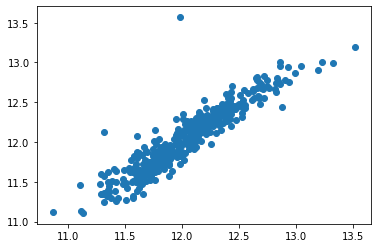

MAE: 0.1025108588794794
MSE: 0.023020141010758246
RMSE: 0.15172389729623428

Accuracy : 0.8510130611118579


In [47]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lm = LinearRegression()

#Fitting linear model on train dataset
lm.fit(X_train,y_train)

#Test dataset prediction
lm_predictions = lm.predict(X_test)

#Scatterplot
plt.scatter(y_test, lm_predictions)
plt.show()

#Evaluation
print("MAE:", metrics.mean_absolute_error(y_test, lm_predictions))
print('MSE:', metrics.mean_squared_error(y_test, lm_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lm_predictions)))

#Accuracy
print("\nAccuracy : {}".format(lm.score(X_test,y_test)))

**Gradient Boosting Regressor**

In [45]:
from sklearn.ensemble import GradientBoostingRegressor  #GBM algorithm
from sklearn.model_selection import cross_val_score,GridSearchCV  #Additional scklearn functions and Performing grid search
from sklearn.metrics import mean_absolute_error,mean_squared_error 

In [46]:
#Define a function that helps us in creating GBM models and perform cross validation
def modelfit(alg, train, target, test, target_test, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(train, target)
        
    #Predict training set:
    train_predictions = alg.predict(train)
    test_predictions = alg.predict(test)
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, train, target, cv=cv_folds)
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy on train: {}".format(alg.score(train, target)))
    print ("Accuracy on test: {}".format(alg.score(test, target_test)))
    print("Mean absolute error : {}".format(mean_absolute_error(target_test,test_predictions)))
    print("Mean squared error : {}".format(mean_squared_error(target_test,test_predictions)))
    print("Root mean squared error : {}".format(np.sqrt(mean_squared_error(target_test,test_predictions))))
    
    
    if performCV:
        print ("CV Score : Mean - {} | Std - {} | Min - {} | Max - {}".format(np.mean(cv_score),np.std(cv_score),
                                                                              np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feature_imp=alg.feature_importances_.tolist()
        feature_columns=list(train.columns)
        Import_Df = pd.DataFrame({'Feature': list(train.columns),
                   'Importance': alg.feature_importances_})
        Import_Df = Import_Df.sort_values(by='Importance',ascending=False)
        
        fig=plt.figure(figsize=(15,10))
        fig = sns.barplot(data=Import_Df,x='Feature',y='Importance')
        plt.xticks(rotation=90)
        plt.title("Feature Importances",fontsize=20)
        plt.xlabel("Feature",fontsize=15)
        plt.ylabel("Importances",fontsize=15)
        plt.show()


Model Report
Accuracy on train: 0.9378600481610935
Accuracy on test: 0.8897523807184908
Mean absolute error : 0.09584620674222617
Mean squared error : 0.017034484773636255
Root mean squared error : 0.13051622417782494
CV Score : Mean - 0.850412831536031 | Std - 0.02145031142756898 | Min - 0.8172560247651727 | Max - 0.8748329369721971


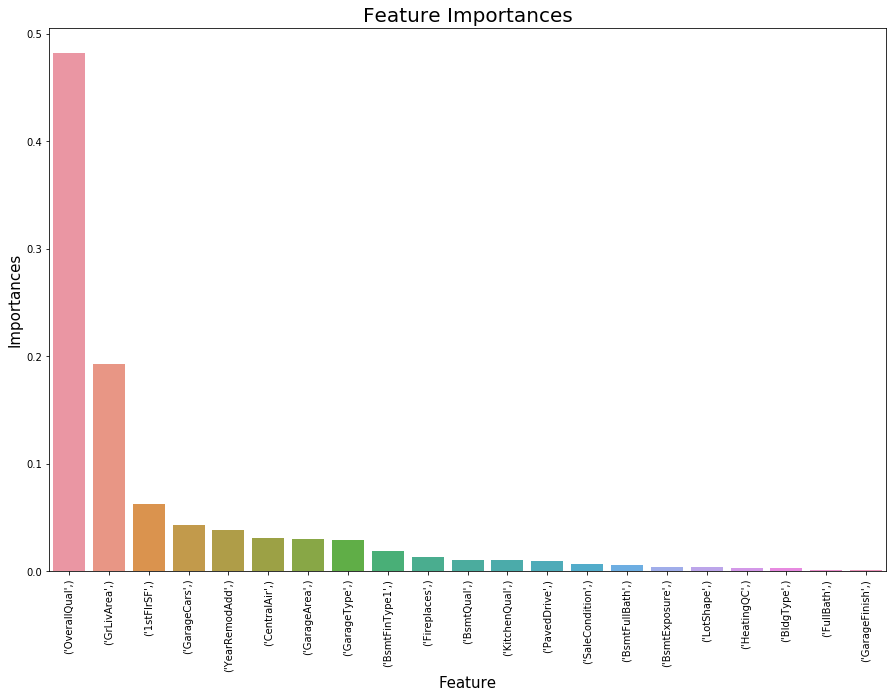

In [50]:
#Baseline model
gbm0 = GradientBoostingRegressor(random_state=5)
modelfit(gbm0,X_train,y_train,X_test,y_test)

* With no parameters, we get a good accuracy of 94% on train dataset and mean cv score of 0.85.
* Let's try increasing this with parameter tuning.

**Hyperparameter tuning**

* **n-estimators** represents the number of trees in the forest. Usually the higher the number of trees the better to learn the data. However, adding a lot of trees can slow down the training process considerably, therefore we do a parameter search to find the sweet spot.
* **max_depth** indicates how deep the built tree can be. The deeper the tree, the more splits it has and it captures more information about how the data
* **min_samples_split** represents the minimum number of samples required to split an internal node. This can vary between considering at least one sample at each node to considering all of the samples at each node. When we increase this parameter, the tree becomes more constrained as it has to consider more samples at each node.
* **min_samples_leaf** is the minimum number of samples required to be at a leaf node. This similar to min_samples_splits, however, this describe the minimum number of samples of samples at the leafs.
* **learning rate** shrinks the contribution of each tree by learning_rate.

In [49]:
gsearch = GridSearchCV(estimator = GradientBoostingRegressor(max_features='sqrt',random_state=5), 
param_grid={'max_depth':[5,7,9], 'n_estimators':[1000,2000,3000],'learning_rate':[1, 0.5, 0.05, 0.01],
            'min_samples_leaf':[5,10,15],'min_samples_split':[10,20,30]},iid=False, cv=5)
gsearch.fit(X_train,y_train)

gsearch.cv_results_, gsearch.best_params_, gsearch.best_score_

({'mean_fit_time': array([0.70402722, 1.31739206, 1.80603995, 0.74567952, 1.43840919,
         2.00765991, 0.67710609, 1.37654781, 2.10176163, 0.70066347,
         1.27465925, 2.07095475, 0.9049448 , 1.33996539, 2.0442524 ,
         0.83468614, 1.35111575, 1.95031176, 0.74485726, 1.22003703,
         1.86907296, 0.74630017, 1.40822692, 2.21920543, 0.67892256,
         1.45878944, 1.97313318, 0.76857462, 1.38754578, 1.97944732,
         0.70525327, 1.25096774, 1.84790487, 0.64765029, 1.2905714 ,
         1.98159399, 0.66649938, 1.29998221, 1.82930026, 0.64933796,
         1.23307362, 1.85310802, 0.65348992, 1.23716283, 1.86800218,
         0.66262875, 1.24228878, 1.82651062, 0.75876522, 1.31889796,
         1.87569695, 0.67380404, 1.240378  , 1.82744284, 0.66846137,
         1.30253944, 1.934091  , 0.6686419 , 1.2984045 , 1.9314774 ,
         0.67595353, 1.35630755, 1.91119547, 0.66067386, 1.32080517,
         1.87102804, 0.65932779, 1.44843526, 1.91453314, 0.67774472,
         1.269047

* Fitting the model again with optimal parameters for checking any improvement in accuracy.
* learning_rate = 0.01; min_samples_leaf = 10, min_samples_split = 10; max_depth = 5; n_estimators = 1000.


Model Report
Accuracy on train: 0.9420734586596703
Accuracy on test: 0.8798102582134345
Mean absolute error : 0.09332279556799039
Mean squared error : 0.018570653405065488
Root mean squared error : 0.1362741846611657
CV Score : Mean - 0.8696040598580568 | Std - 0.01610979248470934 | Min - 0.8420785322929984 | Max - 0.8908382128949428


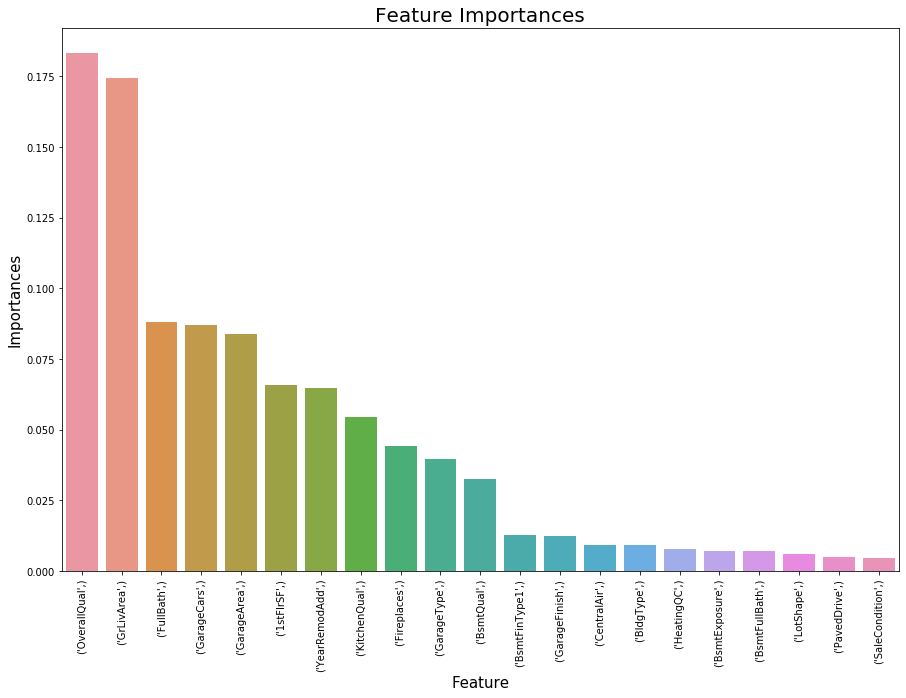

In [52]:
gbm2 = GradientBoostingRegressor(random_state=5,n_estimators=1000,learning_rate=0.01,
                                max_depth=5,min_samples_split=10,max_features='sqrt',
                                min_samples_leaf=10,loss='huber')
modelfit(gbm2,X_train,y_train,X_test,y_test)

* Now our model is able to derive value from many more variables.
* We can see a better accuracy in our training dataset with hyperparameter tuning.
* Although our test accuracy has decreased a little bit.

**Prediction on test dataset**

In [53]:
gbm_predictions2 = gbm2.predict(test)
np.exp(gbm_predictions2)

array([106060.81773925, 121948.39329376, 131077.64789279, ...,
       115312.81229168,  89629.26134899, 148180.22723411])

**XGBoost Regressor**

In [43]:
from xgboost import XGBRegressor

**Hyperparameter tunning**

In [67]:
param_test1 = {
 'n_estimators': range(1000,4000,1000)
}
gsearch1_xgboost = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1,min_child_weight=3,gamma=0, subsample=0.8, colsample_bytree=0.8), 
 param_grid = param_test1,iid=False, cv=5)

gsearch1_xgboost.fit(X_train,y_train)

gsearch1_xgboost.cv_results_, gsearch1_xgboost.best_params_, gsearch1_xgboost.best_score_

({'mean_fit_time': array([0.89633164, 1.39944992, 1.76331272]),
  'std_fit_time': array([0.04904552, 0.06523732, 0.12159315]),
  'mean_score_time': array([0.00930848, 0.01113582, 0.01381559]),
  'std_score_time': array([0.00186658, 0.00120931, 0.00170151]),
  'param_n_estimators': masked_array(data=[1000, 2000, 3000],
               mask=[False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 1000},
   {'n_estimators': 2000},
   {'n_estimators': 3000}],
  'split0_test_score': array([0.81374481, 0.81387381, 0.81388364]),
  'split1_test_score': array([0.84826351, 0.84824578, 0.84826767]),
  'split2_test_score': array([0.84199598, 0.84195957, 0.84192385]),
  'split3_test_score': array([0.8831389 , 0.88311863, 0.88305723]),
  'split4_test_score': array([0.85583713, 0.85569879, 0.85564206]),
  'mean_test_score': array([0.84859606, 0.84857932, 0.84855489]),
  'std_test_score': array([0.02237821, 0.02232512, 0.02230151]),
  'rank_test_score':

* Similarly, we search for optimal parameters by using the same technics. Then we run the model corresponding to the optimal obtained parameters. 


Model Report
Accuracy on train: 0.9999700089109578
Accuracy on test: 0.8822709862950704
Mean absolute error : 0.09828764031010563
Mean squared error : 0.018190443516526746
Root mean squared error : 0.13487195229745413
CV Score : Mean - 0.8488252884732056 | Std - 0.0194188130645469 | Min - 0.8181347213001984 | Max - 0.8723573736890664


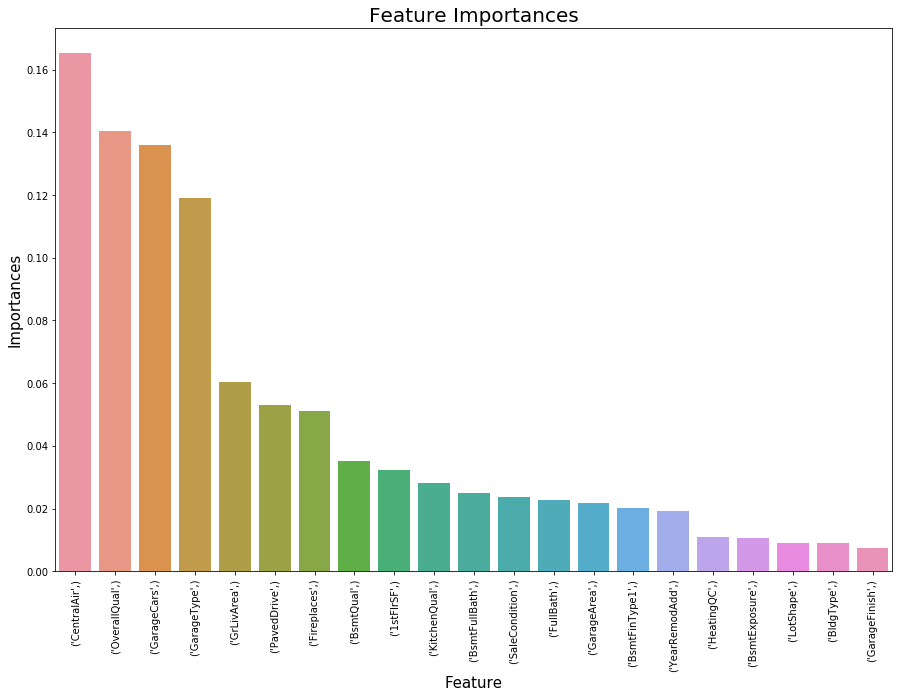

In [68]:
xgb0 = XGBRegressor(n_estimators=1000, learning_rate=0.05, gamma=0, subsample=0.75,max_depth=7,random_state=5,
                   min_child_weight=1,colsample_bytree=0.8)

modelfit(xgb0,X_train,y_train,X_test,y_test)

We get the best accuracy with XGBoost model of 99% for our training dataset.

* Final prediction with XGBoost on test dataset.
* Using np.exp for Inverse log transformation on price .

In [69]:
xgb_prediction = xgb0.predict(test)
np.exp(xgb_prediction)

array([106995.95 ,  99789.14 , 104411.305, ..., 107784.555,  74877.086,
       131177.22 ], dtype=float32)